# Initialize

In [2]:
import sys, os
sys.dont_write_bytecode = True
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["CUDA_VISIBLE_DEVICES"]="0,2,3"
#os.environ["CUDA_VISIBLE_DEVICES"]="0"
sys.dont_write_bytecode = True
#ADD RELATIVE PATH TO MODULE

import NF4HEP

import numpy as np
from jupyterthemes import jtplot
from matplotlib import pyplot as plt
from timeit import default_timer as timer
import numpy as np
import pandas as pd
jtplot.reset()

%load_ext tensorboard

import tensorflow as tf
from tensorflow.keras.layers import Layer
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb= tfp.bijectors

print("Available GPUs:",tf.config.list_physical_devices('GPU'))

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')]


# Data Object

## Define Data Object

In [3]:
def MixtureGaussian(ncomp,ndims,seed=0):
    DefaultDistributions=NF4HEP.distributions.DefaultDistributions()
    targ_dist = DefaultDistributions.MixMultiNormal1(n_components=ncomp,
                                                     n_dimensions=ndims,
                                                     seed=seed)
    return targ_dist

In [4]:
distr = MixtureGaussian(ncomp=3,ndims=8,seed=0)

In [5]:
#distr = tfd.Sample(tfd.Mixture(cat = tfd.Categorical(probs=[0.3,.7]),
#                               components = [tfd.Normal(loc=3.3, scale=0.4),
#                                             tfd.Normal(loc=1.8, scale=0.2)]),
#                   sample_shape = [10])

In [6]:
data_X = distr.sample(100000).numpy()
data_Y = distr.log_prob(data_X).numpy()
dtype = ["float64","float32"]
pars_central = np.mean(data_X,axis=0)

In [7]:
FileManager = NF4HEP.inputs.data.DataFileManager(name = "prova",
                                                 input_file = None, 
                                                 output_folder = "prova/data",
                                                 load_on_RAM = True,
                                                 verbose = True)

ParsManager = NF4HEP.inputs.data.DataParsManager(ndims = 10,
                                                 pars_bounds = None,
                                                 pars_central = None,
                                                 pars_labels = None,
                                                 pars_pos_nuis = None,
                                                 pars_pos_poi = None,
                                                 verbose = True)

DataSamples = NF4HEP.inputs.data.DataSamples(data_X = data_X,
                                             data_Y = data_Y,
                                             dtype = ["float64","float32"],
                                             verbose = True)

Initializing FileManager object.

------------------------------ 
Output folder set to
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/data .

Initializing ParsManager object.

------------------------------ 
No central values for the parameters 'pars_central' have been specified. The central values have been set to zero for all. If they are known it is suggested to build the object providing parameters central values.

------------------------------ 
The positions of the parameters of interest (pars_pos_poi) and of the nuisance parameters (pars_pos_nuis) have not been specified. Assuming all parameters are parameters of interest.

------------------------------ 
No bounds for the parameters 'pars_bounds' have been specified. The bounds have been set to [-inf,inf] for all parameters. If they are known it is suggested to build the object providing parameters bounds.

Initializing DataSamples object.



In [8]:
DataMain = NF4HEP.inputs.data.DataMain(file_manager = FileManager,
                                       pars_manager = ParsManager,
                                       input_data = DataSamples,
                                       npoints = [50000, 30000, 20000], # list with [n_train, n_val, n_test]
                                       preprocessing = [True, True, False], # list with [scalerX_bool, scalerY_bool, rotationX_bool]s
                                       seed = 0,
                                       verbose = True)

Initializing DataMain object.

------------------------------ 
Setting FileManager.

Initializing Predictions.

------------------------------ 
Setting Predictions.

Initializing Figures.

------------------------------ 
Setting Figures.

------------------------------ 
Initializing new DataMain object.

------------------------------ 
Setting seed to 0 .

------------------------------ 
Setting ParsManager.

------------------------------ 
Setting DataSamples.

Initializing DataManager.

------------------------------ 
Set the number of required points: train ( 50000 ); val ( 30000 ); test ( 20000 ).

------------------------------ 
Set the preprocessing flags: scalerX_bool ( True ); scalerY_bool ( True ); rotationX_bool ( False ).

------------------------------ 
Initializing preprocessing objects: scalerX, scalerY, rotationX.

------------------------------ 
Initializing TrainData object.

------------------------------ 
Initializing TrainData object.

------------------------------

In [9]:
DataMain.__dict__

{'_verbose': True,
 '_verbose_sub': True,
 '_FileManager': <NF4HEP.inputs.data.DataFileManager at 0x7fdea615c580>,
 '_log': {'datetime_2023_03_10_09_44_15_4823': {'action': 'FileManager object set'},
  'datetime_2023_03_10_09_44_15_4821': {'action': 'DataMain object created from input arguments'},
  'datetime_2023_03_10_09_44_15_4825': {'action': 'Figures object set'},
  'datetime_2023_03_10_09_44_15_4859': {'action': 'seed reset', 'value': 0},
  'datetime_2023_03_10_09_44_15_4887': {'action': 'ParsManager object set'},
  'datetime_2023_03_10_09_44_15_4888': {'action': 'InputData object set'},
  'datetime_2023_03_10_09_44_15_4891': {'action': 'set npoints',
   'npoints train': [50000],
   'npoints val': [50000],
   'npoints test': [30000]},
  'datetime_2023_03_10_09_44_15_4901': {'action': 'DataManager object set'},
  'datetime_2023_03_10_09_44_15_4903': {'action': 'Inference object set'},
  'datetime_2023_03_10_09_44_15_4905': {'action': 'Plotter object set'},
  'datetime_2023_03_10_0

## Check weakref

In [10]:
import weakref, sys

In [11]:
[[x,str(x).split("at")[3].strip()] for x in [DataMain,
                                             DataMain.FileManager,
                                             DataMain.ParsManager,
                                             DataMain.Predictions,
                                             DataMain.Figures]]

[[<NF4HEP.inputs.data.DataMain at 0x229d4268580>, '0x00000229D4268580>'],
  '0x00000229D3F2D790>'],
  '0x00000229D3F2D2E0>'],
  '0x00000229D42687C0>'],
  '0x00000229D4268520>']]

In [12]:
Weakrefs = [weakref.ref(x) for x in [DataMain,
                                     DataMain.FileManager,
                                     DataMain.ParsManager,
                                     DataMain.Predictions,
                                     DataMain.Figures]]

In [13]:
Weakrefs

[<weakref at 0x0000022981BBB9F0; to 'DataMain' at 0x00000229D4268580>,
 <weakref at 0x0000022981BD9E50; to 'DataFileManager' at 0x00000229D3F2D790>,
 <weakref at 0x0000022981BCFA90; to 'DataParsManager' at 0x00000229D3F2D2E0>,
 <weakref at 0x0000022981C088B0; to 'DataPredictionsManager' at 0x00000229D42687C0>,
 <weakref at 0x0000022981C082C0; to 'DataFiguresManager' at 0x00000229D4268520>]

In [14]:
sys.getrefcount(DataMain)

3

In [15]:
del(DataMain._Figures)

In [16]:
DataMain.Predictions.ManagedObject.Figures

AttributeError: 'DataMain' object has no attribute '_Figures'

In [17]:
Weakrefs[-1]().ManagedObject

In [18]:
Weakrefs[0]().Predictions.ManagedObject

In [19]:
file_man = DataMain.FileManager
fig = DataMain.Figures

AttributeError: 'DataMain' object has no attribute '_Figures'

In [20]:
file_man.ManagedObject

In [21]:
fig.ManagedObject.DataManager.ManagedObject

NameError: name 'fig' is not defined

In [22]:
file_man.ManagedObject

In [23]:
id("0x23a866eaeb0")

2377294157168

In [24]:
del(DataMain._FileManager)

In [25]:
del(DataMain._Figures)

AttributeError: _Figures

In [26]:
fig

NameError: name 'fig' is not defined

In [27]:
del(DataMain)

In [28]:
file_man.ManagedObject

In [29]:
fig.ManagedObject.Inference

NameError: name 'fig' is not defined

## Check Managed Object

In [9]:
FileManager.ManagedObject = "pippo"

TypeError: DataFileManager object does not support object of type <class 'str'> as managed object.

In [10]:
DataMain.Predictions.ManagedObject = "pippo"

TypeError: DataPredictionsManager object does not support object of type <class 'str'> as managed object.

## Load and check Data object (load_on_RAM = False)

In [7]:
FileManagerInput1 = NF4HEP.inputs.data.DataFileManager(name = None,
                                                       input_file = "prova/prova_datamain", 
                                                       output_folder = None,
                                                       load_on_RAM = False,
                                                       verbose = True)

Initializing FileManager object.

------------------------------ 
Input folder set to
	 C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NFTF2_dev\prova .

------------------------------ 
Output folder set to
	 C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NFTF2_dev\prova .



In [8]:
DataMainInput1 = NF4HEP.inputs.data.DataMain(file_manager = FileManagerInput1,
                                             pars_manager = None,
                                             input_data = None,
                                             npoints = None, # list with [n_train, n_val, n_test]
                                             preprocessing = None, # list with [scalerX_bool, scalerY_bool, rotationX_bool]s
                                             seed = 0,
                                             verbose = True)

Initializing DataMain object.

------------------------------ 
Setting FileManager.

Initializing Predictions.

------------------------------ 
Setting Predictions.

Initializing Figures.

------------------------------ 
Setting Figures.

------------------------------ 
Loading existing DataMain object.

------------------------------ 

------------------------------ 
 <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0> log file
	 C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NFTF2_dev\prova\prova_datamain.log 
loaded in 0.01226079999999996 s.

------------------------------ 
 <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0> json file
	 C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NFTF2_dev\prova\prova_datamain.json 
loaded in 0.0013996000000062736 s.

Initializing ParsManager object.

------------------------------ 
Only the positions of the parameters of interest have been specified. Assuming all other pa

In [9]:
DataMainInput1.log

{'datetime_2022_12_20_15_07_53_5461': {'action': 'FileManager object set'},
 'datetime_2022_12_20_15_07_53_5451': {'action': 'DataMain object reconstructed from loaded files'},
 'datetime_2022_12_20_15_07_53_5471': {'action': 'Predictions object set'},
 'datetime_2022_12_20_15_07_53_5481': {'action': 'Figures object set'},
 'datetime_2022_12_20_15_07_45_9329': {'action': 'Figures object set'},
 'datetime_2022_12_20_15_07_45_9339': {'action': 'set npoints',
  'npoints train': [50000],
  'npoints val': [50000],
  'npoints test': [30000]},
 'datetime_2022_12_20_15_07_45_9349': {'action': 'Plotter object set'},
 'datetime_2022_12_20_15_07_45_9369': {'action': 'saved json',
  'file name': 'prova_datamain.json'},
 'datetime_2022_12_20_15_07_45_9389': {'action': 'saved json',
  'file name': 'prova_datamain_idx.json'},
 'datetime_2022_12_20_15_07_45_9469': {'action': 'saved h5',
  'file name': 'prova_datamain_idx.h5'},
 'datetime_2022_12_20_15_07_45_9609': {'action': 'saved h5',
  'file name':

In [10]:
NF4HEP.utils.utils.dic_minus_keys(DataMainInput1.__dict__,["_log"])

{'_verbose': True,
 '_verbose_sub': True,
 '_FileManager': <NF4HEP.inputs.data.DataFileManager at 0x1c795196a60>,
 '_Predictions': <NF4HEP.inputs.data.DataPredictionsManager at 0x1c7fc192b80>,
 '_Figures': <NF4HEP.inputs.data.DataFiguresManager at 0x1c7fb184220>,
 '_seed': 0,
 '_ParsManager': <NF4HEP.inputs.data.DataParsManager at 0x1c794de51f0>,
 '_InputData': <NF4HEP.inputs.data.DataSamples at 0x1c794e08e80>,
 '_DataManager': <NF4HEP.inputs.data.DataManager at 0x1c7faf90850>,
 '_Inference': <NF4HEP.inputs.data.DataInference at 0x1c7fc268af0>,
 '_Plotter': <NF4HEP.inputs.data.DataPlotter at 0x1c7fb1847c0>}

## Check

### Check FileManager

In [11]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMain.FileManager._name, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_managed_object_name': ["<class 'str'>", 'DataMain'],
  '_name_str': ["<class 'str'>", 'prova_datamain']},
 'public attributes': {},
 'private properties': {},
 'public properties': {'managed_object_name': ["<class 'str'>", 'DataMain'],
  'name_str': ["<class 'str'>", 'prova_datamain']},
 'private methods': {'_Name__check_define_name': ["<class 'method'>",
   <bound method Name.__check_define_name of <NF4HEP.base.Name object at 0x000001C794DF0100>>]},
 'public methods': {}}

In [12]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMainInput1.FileManager._name, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_managed_object_name': ["<class 'str'>", 'DataMain'],
  '_name_str': ["<class 'str'>", 'prova_datamain']},
 'public attributes': {},
 'private properties': {},
 'public properties': {'managed_object_name': ["<class 'str'>", 'DataMain'],
  'name_str': ["<class 'str'>", 'prova_datamain']},
 'private methods': {'_Name__check_define_name': ["<class 'method'>",
   <bound method Name.__check_define_name of <NF4HEP.base.Name object at 0x000001C7FC3EB970>>]},
 'public methods': {}}

In [13]:
NF4HEP.utils.utils.compare_objects(DataMain.FileManager,DataMainInput1.FileManager,string="FileManager",only_dict=True,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

!!!!!> EXCLUDED:  FileManager - _ManagedObject : Values are <NF4HEP.inputs.data.DataMain object at 0x000001C794EADC10> and <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0> .

=====> DIFFERENCE:  FileManager - _input_file : Values are None and C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NFTF2_dev\prova\prova_datamain .

=====> DIFFERENCE:  FileManager - _load_on_RAM : Values are True and False .

-----> OK:  FileManager - _name : Dictionaries are equal.

=====> DIFFERENCE:  FileManager - _opened_dataset : Values are None and <HDF5 file "prova_datamain_samples.h5" (mode r)> .

-----> OK:  FileManager - _output_folder : Values are equal.

-----> OK:  FileManager - _verbose : Values are equal.

-----> OK:  FileManager - _verbose_sub : Values are equal.



[['FileManager - _input_file',
  None,
  WindowsPath('C:/Users/Riccardo Torre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NFTF2_dev/prova/prova_datamain')],
 ['FileManager - _load_on_RAM', True, False],
 ['FileManager - _opened_dataset',
  None,
  <HDF5 file "prova_datamain_samples.h5" (mode r)>]]

In [14]:
NF4HEP.utils.utils.compare_objects(DataMain.FileManager,DataMainInput1.FileManager,string="FileManager",only_dict=False,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

!!!!!> EXCLUDED:  FileManager - private attributes - _ManagedObject : Values are ["<class 'NF4HEP.inputs.data.DataMain'>", <NF4HEP.inputs.data.DataMain object at 0x000001C794EADC10>] and ["<class 'NF4HEP.inputs.data.DataMain'>", <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0>] .

=====> DIFFERENCE:  FileManager - private attributes - _input_file - list entry 0 : Values are <class 'NoneType'> and <class 'pathlib.WindowsPath'> .

=====> DIFFERENCE:  FileManager - private attributes - _input_file - list entry 1 : Values are None and C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NFTF2_dev\prova\prova_datamain .

-----> OK:  FileManager - private attributes - _load_on_RAM - list entry 0  Items are equal.

=====> DIFFERENCE:  FileManager - private attributes - _load_on_RAM - list entry 1 : Values are True and False .

-----> OK:  FileManager - private attributes - _name - list entry 0  Items are equal.

-----> OK:  FileManager - private attributes - 

=====> DIFFERENCE:  FileManager - public properties - input_object_json_file - list entry 0 : Values are <class 'NoneType'> and <class 'pathlib.WindowsPath'> .

=====> DIFFERENCE:  FileManager - public properties - input_object_json_file - list entry 1 : Values are None and C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NFTF2_dev\prova\prova_datamain.json .

=====> DIFFERENCE:  FileManager - public properties - input_predictions_h5_file - list entry 0 : Values are <class 'NoneType'> and <class 'pathlib.WindowsPath'> .

=====> DIFFERENCE:  FileManager - public properties - input_predictions_h5_file - list entry 1 : Values are None and C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NFTF2_dev\prova\prova_datamain_predictions.h5 .

=====> DIFFERENCE:  FileManager - public properties - input_preprocessing_h5_file - list entry 0 : Values are <class 'NoneType'> and <class 'pathlib.WindowsPath'> .

=====> DIFFERENCE:  FileManager - pu

[['FileManager - private attributes - _input_file - list entry 0',
  "<class 'NoneType'>",
  "<class 'pathlib.WindowsPath'>"],
 ['FileManager - private attributes - _input_file - list entry 1',
  None,
  WindowsPath('C:/Users/Riccardo Torre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NFTF2_dev/prova/prova_datamain')],
 ['FileManager - private attributes - _load_on_RAM - list entry 1',
  True,
  False],
 ['FileManager - private attributes - _opened_dataset - list entry 0',
  "<class 'NoneType'>",
  "<class 'h5py._hl.files.File'>"],
 ['FileManager - private attributes - _opened_dataset - list entry 1',
  None,
  <HDF5 file "prova_datamain_samples.h5" (mode r)>],
 ['FileManager - public properties - input_file - list entry 0',
  "<class 'NoneType'>",
  "<class 'pathlib.WindowsPath'>"],
 ['FileManager - public properties - input_file - list entry 1',
  None,
  WindowsPath('C:/Users/Riccardo Torre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NFTF2_dev/prova/prova_datamain')

### Check Predictions

In [15]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMain.Predictions, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  '_predictions_dict': ["<class 'dict'>", {}]},
 'public attributes': {},
 'private properties': {'_abc_impl': ["<class '_abc._abc_data'>",
   <_abc._abc_data at 0x1c7fb06e880>]},
 'public properties': {'ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  'managed_object_name': ["<class 'str'>", 'DataMain'],
  'predictions_dict': ["<class 'dict'>", {}]},
 'private methods': {},
 'public methods': {'init_predictions': ["<class 'method'>",
   <bound method DataPredictionsManager.init_predictions of <NF4HEP.inputs.data.DataPredictionsManager object at 0x000001C7FC3CE1C0>>],
  'reset_predictions': ["<class 'method'>",
   <bound method DataPredictionsManager.reset_predictions of <NF4HEP.inputs.data.DataPredictionsManager object at 0x000001C7FC3CE1C0>>],
  'validate_predictions': ["<class 'method'>",
   <bound method DataPredictionsManager.validate_predictions of <NF4HEP.inputs.data.DataPredictionsMan

In [16]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMainInput1.Predictions, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  '_predictions_dict': ["<class 'dict'>", {}]},
 'public attributes': {},
 'private properties': {'_abc_impl': ["<class '_abc._abc_data'>",
   <_abc._abc_data at 0x1c7fb06e880>]},
 'public properties': {'ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  'managed_object_name': ["<class 'str'>", 'DataMain'],
  'predictions_dict': ["<class 'dict'>", {}]},
 'private methods': {},
 'public methods': {'init_predictions': ["<class 'method'>",
   <bound method DataPredictionsManager.init_predictions of <NF4HEP.inputs.data.DataPredictionsManager object at 0x000001C7FC192B80>>],
  'reset_predictions': ["<class 'method'>",
   <bound method DataPredictionsManager.reset_predictions of <NF4HEP.inputs.data.DataPredictionsManager object at 0x000001C7FC192B80>>],
  'validate_predictions': ["<class 'method'>",
   <bound method DataPredictionsManager.validate_predictions of <NF4HEP.inputs.data.DataPredictionsMan

In [17]:
NF4HEP.utils.utils.compare_objects(DataMain.Predictions,DataMainInput1.Predictions,string="Predictions",only_dict=True,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=1)

Comparing obejects Predictions .
Comparing dictionaries Predictions .
!!!!!> EXCLUDED:  Predictions - _ManagedObject : Values are <NF4HEP.inputs.data.DataMain object at 0x000001C794EADC10> and <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0> .

Comparing keys Predictions - _predictions_dict .
Keys Predictions - _predictions_dict are dictionaries.
Comparing dictionaries Predictions - _predictions_dict .
-----> OK:  Predictions - _predictions_dict : Dictionaries are equal.

-----> OK:  Predictions : Dictionaries are equal.



[]

In [18]:
NF4HEP.utils.utils.compare_objects(DataMain.Predictions,DataMainInput1.Predictions,string="Predictions",only_dict=False,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

!!!!!> EXCLUDED:  Predictions - private attributes - _ManagedObject : Values are ["<class 'NF4HEP.inputs.data.DataMain'>", <NF4HEP.inputs.data.DataMain object at 0x000001C794EADC10>] and ["<class 'NF4HEP.inputs.data.DataMain'>", <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0>] .

-----> OK:  Predictions - private attributes - _predictions_dict : Lists are equal.

-----> OK:  Predictions - private attributes : Dictionaries are equal.

-----> OK:  Predictions - private methods : Dictionaries are equal.

-----> OK:  Predictions - private properties : Dictionaries are equal.

-----> OK:  Predictions - public attributes : Dictionaries are equal.

-----> OK:  Predictions - public methods - init_predictions - list entry 0  Items are equal.

-----> OK:  Predictions - public methods - init_predictions - list entry 1 : Dictionaries are equal.

-----> OK:  Predictions - public methods - reset_predictions - list entry 0  Items are equal.

-----> OK:  Predictions - public methods - reset

[]

### Check Figures

In [19]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMain.Figures, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  '_figures_dict': ["<class 'dict'>", {}]},
 'public attributes': {},
 'private properties': {},
 'public properties': {'ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  'figures_dict': ["<class 'dict'>", {}],
  'managed_object_name': ["<class 'str'>", 'DataMain']},
 'private methods': {},
 'public methods': {'check_delete_figures': ["<class 'method'>",
   <bound method FiguresManager.check_delete_figures of <NF4HEP.inputs.data.DataFiguresManager object at 0x000001C7FC1EDF70>>],
  'check_figures_dic': ["<class 'method'>",
   <bound method FiguresManager.check_figures_dic of <NF4HEP.inputs.data.DataFiguresManager object at 0x000001C7FC1EDF70>>],
  'check_figures_list': ["<class 'method'>",
   <bound method FiguresManager.check_figures_list of <NF4HEP.inputs.data.DataFiguresManager object at 0x000001C7FC1EDF70>>],
  'init_figures': ["<class 'method'>",
   <bound method FiguresManager.init_figur

In [20]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMainInput1.Figures, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  '_figures_dict': ["<class 'dict'>", {}]},
 'public attributes': {},
 'private properties': {},
 'public properties': {'ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  'figures_dict': ["<class 'dict'>", {}],
  'managed_object_name': ["<class 'str'>", 'DataMain']},
 'private methods': {},
 'public methods': {'check_delete_figures': ["<class 'method'>",
   <bound method FiguresManager.check_delete_figures of <NF4HEP.inputs.data.DataFiguresManager object at 0x000001C7FB184220>>],
  'check_figures_dic': ["<class 'method'>",
   <bound method FiguresManager.check_figures_dic of <NF4HEP.inputs.data.DataFiguresManager object at 0x000001C7FB184220>>],
  'check_figures_list': ["<class 'method'>",
   <bound method FiguresManager.check_figures_list of <NF4HEP.inputs.data.DataFiguresManager object at 0x000001C7FB184220>>],
  'init_figures': ["<class 'method'>",
   <bound method FiguresManager.init_figur

In [21]:
NF4HEP.utils.utils.compare_objects(DataMain.Figures,DataMainInput1.Figures,string="Figures",only_dict=True,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

!!!!!> EXCLUDED:  Figures - _ManagedObject : Values are <NF4HEP.inputs.data.DataMain object at 0x000001C794EADC10> and <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0> .

-----> OK:  Figures - _figures_dict : Dictionaries are equal.

-----> OK:  Figures : Dictionaries are equal.



[]

In [22]:
NF4HEP.utils.utils.compare_objects(DataMain.Figures,DataMainInput1.Figures,string="Figures",only_dict=False,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

!!!!!> EXCLUDED:  Figures - private attributes - _ManagedObject : Values are ["<class 'NF4HEP.inputs.data.DataMain'>", <NF4HEP.inputs.data.DataMain object at 0x000001C794EADC10>] and ["<class 'NF4HEP.inputs.data.DataMain'>", <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0>] .

-----> OK:  Figures - private attributes - _figures_dict : Lists are equal.

-----> OK:  Figures - private attributes : Dictionaries are equal.

-----> OK:  Figures - private methods : Dictionaries are equal.

-----> OK:  Figures - private properties : Dictionaries are equal.

-----> OK:  Figures - public attributes : Dictionaries are equal.

-----> OK:  Figures - public methods - check_delete_figures - list entry 0  Items are equal.

-----> OK:  Figures - public methods - check_delete_figures - list entry 1 : Dictionaries are equal.

-----> OK:  Figures - public methods - check_figures_dic - list entry 0  Items are equal.

-----> OK:  Figures - public methods - check_figures_dic - list entry 1 : Dictio

[]

### Check ParsManager

In [23]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMain.ParsManager, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_verbose': ["<class 'bool'>", True],
  '_verbose_sub': ["<class 'bool'>", True],
  '_ndims': ["<class 'int'>", 10],
  '_pars_bounds': ["<class 'numpy.ndarray'>",
   array([[-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf]])],
  '_pars_central': ["<class 'numpy.ndarray'>",
   array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
  '_pars_labels': ["<class 'numpy.ndarray'>",
   array(['$\\theta_{1}$', '$\\theta_{2}$', '$\\theta_{3}$', '$\\theta_{4}$',
          '$\\theta_{5}$', '$\\theta_{6}$', '$\\theta_{7}$', '$\\theta_{8}$',
          '$\\theta_{9}$', '$\\theta_{10}$'], dtype='<U13')],
  '_pars_pos_nuis': ["<class 'numpy.ndarray'>", array([], dtype=int32)],
  '_pars_pos_poi': ["<class 'numpy.ndarray'>",
   array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])],
  '_pars_labels_auto': ["<class 'numpy.ndar

In [24]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMainInput1.ParsManager, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_verbose': ["<class 'bool'>", True],
  '_verbose_sub': ["<class 'bool'>", True],
  '_ndims': ["<class 'int'>", 10],
  '_pars_bounds': ["<class 'numpy.ndarray'>",
   array([[-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf],
          [-inf,  inf]])],
  '_pars_central': ["<class 'numpy.ndarray'>",
   array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
  '_pars_labels': ["<class 'numpy.ndarray'>",
   array(['$\\theta_{1}$', '$\\theta_{2}$', '$\\theta_{3}$', '$\\theta_{4}$',
          '$\\theta_{5}$', '$\\theta_{6}$', '$\\theta_{7}$', '$\\theta_{8}$',
          '$\\theta_{9}$', '$\\theta_{10}$'], dtype='<U13')],
  '_pars_pos_nuis': ["<class 'numpy.ndarray'>", array([], dtype=int32)],
  '_pars_pos_poi': ["<class 'numpy.ndarray'>",
   array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])],
  '_pars_labels_auto': ["<class 'numpy.ndar

In [25]:
NF4HEP.utils.utils.compare_objects(DataMain.ParsManager,DataMainInput1.ParsManager,string="ParsManager",only_dict=True,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

-----> OK:  ParsManager - _ndims : Values are equal.

-----> OK:  ParsManager - _pars_bounds : Lists are equal.

-----> OK:  ParsManager - _pars_central : Lists are equal.

-----> OK:  ParsManager - _pars_labels : Lists are equal.

-----> OK:  ParsManager - _pars_labels_auto : Lists are equal.

-----> OK:  ParsManager - _pars_pos_nuis : Lists are equal.

-----> OK:  ParsManager - _pars_pos_poi : Lists are equal.

-----> OK:  ParsManager - _verbose : Values are equal.

-----> OK:  ParsManager - _verbose_sub : Values are equal.

-----> OK:  ParsManager : Dictionaries are equal.



[]

In [26]:
NF4HEP.utils.utils.compare_objects(DataMain.ParsManager,DataMainInput1.ParsManager,string="ParsManager",only_dict=False,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

-----> OK:  ParsManager - private attributes - _ndims : Lists are equal.

-----> OK:  ParsManager - private attributes - _pars_bounds - list entry 0  Items are equal.

-----> OK:  ParsManager - private attributes - _pars_bounds - list entry 1 : Lists are equal.

-----> OK:  ParsManager - private attributes - _pars_central - list entry 0  Items are equal.

-----> OK:  ParsManager - private attributes - _pars_central - list entry 1 : Lists are equal.

-----> OK:  ParsManager - private attributes - _pars_labels - list entry 0  Items are equal.

-----> OK:  ParsManager - private attributes - _pars_labels - list entry 1 : Lists are equal.

-----> OK:  ParsManager - private attributes - _pars_labels_auto - list entry 0  Items are equal.

-----> OK:  ParsManager - private attributes - _pars_labels_auto - list entry 1 : Lists are equal.

-----> OK:  ParsManager - private attributes - _pars_pos_nuis - list entry 0  Items are equal.

-----> OK:  ParsManager - private attributes - _pars_pos_nuis 

[]

### Check InputData

In [27]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMain.InputData, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_verbose': ["<class 'bool'>", True],
  '_verbose_sub': ["<class 'bool'>", True],
  '_data_X': ["<class 'numpy.ndarray'>",
   array([[3.0206141, 1.8420538, 1.788405 , ..., 1.5285466, 2.7709763,
           1.6916001],
          [1.9691654, 1.7952554, 3.864618 , ..., 1.910951 , 1.6890311,
           2.6126251],
          [3.548389 , 3.7347088, 2.0610607, ..., 1.8379154, 3.7212818,
           1.814035 ],
          ...,
          [2.1173267, 3.6038363, 3.5357788, ..., 1.767439 , 2.3279197,
           2.049895 ],
          [1.7875178, 1.7023718, 3.5026624, ..., 1.6886852, 1.7567775,
           1.6579304],
          [3.4054513, 1.7512885, 2.1075294, ..., 1.9033816, 1.9312149,
           1.7727898]], dtype=float32)],
  '_data_Y': ["<class 'numpy.ndarray'>", array([1., 1., 1., ..., 1., 1., 1.])],
  '_npoints': ["<class 'int'>", 100000],
  '_ndims': ["<class 'int'>", 10],
  '_dtype_stored': ["<class 'type'>", numpy.float64],
  '_dtype_required': ["<class 'type'>", numpy.

In [28]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMainInput1.InputData, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_verbose': ["<class 'bool'>", True],
  '_verbose_sub': ["<class 'bool'>", True],
  '_data_X': ["<class 'h5py._hl.dataset.Dataset'>",
   <HDF5 dataset "X": shape (100000, 10), type "<f8">],
  '_data_Y': ["<class 'h5py._hl.dataset.Dataset'>",
   <HDF5 dataset "Y": shape (100000,), type "<f8">],
  '_npoints': ["<class 'int'>", 100000],
  '_ndims': ["<class 'int'>", 10],
  '_dtype_stored': ["<class 'type'>", numpy.float64],
  '_dtype_required': ["<class 'type'>", numpy.float32]},
 'public attributes': {},
 'private properties': {},
 'public properties': {'data_X': ["<class 'numpy.ndarray'>",
   array([[3.0206141, 1.8420538, 1.788405 , ..., 1.5285466, 2.7709763,
           1.6916001],
          [1.9691654, 1.7952554, 3.864618 , ..., 1.910951 , 1.6890311,
           2.6126251],
          [3.548389 , 3.7347088, 2.0610607, ..., 1.8379154, 3.7212818,
           1.814035 ],
          ...,
          [2.1173267, 3.6038363, 3.5357788, ..., 1.767439 , 2.3279197,
           2

In [29]:
NF4HEP.utils.utils.compare_objects(DataMain.InputData,DataMainInput1.InputData,string="ParsManager",only_dict=True,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

xxxxx> FAILED:  ParsManager - _data_X : Values could not be compared. Values are [[3.0206141 1.8420538 1.788405  ... 1.5285466 2.7709763 1.6916001]
 [1.9691654 1.7952554 3.864618  ... 1.910951  1.6890311 2.6126251]
 [3.548389  3.7347088 2.0610607 ... 1.8379154 3.7212818 1.814035 ]
 ...
 [2.1173267 3.6038363 3.5357788 ... 1.767439  2.3279197 2.049895 ]
 [1.7875178 1.7023718 3.5026624 ... 1.6886852 1.7567775 1.6579304]
 [3.4054513 1.7512885 2.1075294 ... 1.9033816 1.9312149 1.7727898]] and <HDF5 dataset "X": shape (100000, 10), type "<f8"> .

xxxxx> FAILED:  ParsManager - _data_Y : Values could not be compared. Values are [1. 1. 1. ... 1. 1. 1.] and <HDF5 dataset "Y": shape (100000,), type "<f8"> .

-----> OK:  ParsManager - _dtype_required : Dictionaries are equal.

-----> OK:  ParsManager - _dtype_stored : Dictionaries are equal.

-----> OK:  ParsManager - _ndims : Values are equal.

-----> OK:  ParsManager - _npoints : Values are equal.

-----> OK:  ParsManager - _verbose : Values are

[['ParsManager - _data_X - FAILED TO COMPARE',
  array([[3.0206141, 1.8420538, 1.788405 , ..., 1.5285466, 2.7709763,
          1.6916001],
         [1.9691654, 1.7952554, 3.864618 , ..., 1.910951 , 1.6890311,
          2.6126251],
         [3.548389 , 3.7347088, 2.0610607, ..., 1.8379154, 3.7212818,
          1.814035 ],
         ...,
         [2.1173267, 3.6038363, 3.5357788, ..., 1.767439 , 2.3279197,
          2.049895 ],
         [1.7875178, 1.7023718, 3.5026624, ..., 1.6886852, 1.7567775,
          1.6579304],
         [3.4054513, 1.7512885, 2.1075294, ..., 1.9033816, 1.9312149,
          1.7727898]], dtype=float32),
  <HDF5 dataset "X": shape (100000, 10), type "<f8">],
 ['ParsManager - _data_Y - FAILED TO COMPARE',
  array([1., 1., 1., ..., 1., 1., 1.]),
  <HDF5 dataset "Y": shape (100000,), type "<f8">]]

In [30]:
NF4HEP.utils.utils.compare_objects(DataMain.InputData,DataMainInput1.InputData,string="ParsManager",only_dict=False,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

=====> DIFFERENCE:  ParsManager - private attributes - _data_X - list entry 0 : Values are <class 'numpy.ndarray'> and <class 'h5py._hl.dataset.Dataset'> .

xxxxx> FAILED:  ParsManager - private attributes - _data_X - list entry 1 : Values could not be compared. Values are [[3.0206141 1.8420538 1.788405  ... 1.5285466 2.7709763 1.6916001]
 [1.9691654 1.7952554 3.864618  ... 1.910951  1.6890311 2.6126251]
 [3.548389  3.7347088 2.0610607 ... 1.8379154 3.7212818 1.814035 ]
 ...
 [2.1173267 3.6038363 3.5357788 ... 1.767439  2.3279197 2.049895 ]
 [1.7875178 1.7023718 3.5026624 ... 1.6886852 1.7567775 1.6579304]
 [3.4054513 1.7512885 2.1075294 ... 1.9033816 1.9312149 1.7727898]] and <HDF5 dataset "X": shape (100000, 10), type "<f8"> .

=====> DIFFERENCE:  ParsManager - private attributes - _data_Y - list entry 0 : Values are <class 'numpy.ndarray'> and <class 'h5py._hl.dataset.Dataset'> .

xxxxx> FAILED:  ParsManager - private attributes - _data_Y - list entry 1 : Values could not be compare

[['ParsManager - private attributes - _data_X - list entry 0',
  "<class 'numpy.ndarray'>",
  "<class 'h5py._hl.dataset.Dataset'>"],
 ['ParsManager - private attributes - _data_X - list entry 1',
  array([[3.0206141, 1.8420538, 1.788405 , ..., 1.5285466, 2.7709763,
          1.6916001],
         [1.9691654, 1.7952554, 3.864618 , ..., 1.910951 , 1.6890311,
          2.6126251],
         [3.548389 , 3.7347088, 2.0610607, ..., 1.8379154, 3.7212818,
          1.814035 ],
         ...,
         [2.1173267, 3.6038363, 3.5357788, ..., 1.767439 , 2.3279197,
          2.049895 ],
         [1.7875178, 1.7023718, 3.5026624, ..., 1.6886852, 1.7567775,
          1.6579304],
         [3.4054513, 1.7512885, 2.1075294, ..., 1.9033816, 1.9312149,
          1.7727898]], dtype=float32),
  <HDF5 dataset "X": shape (100000, 10), type "<f8">],
 ['ParsManager - private attributes - _data_Y - list entry 0',
  "<class 'numpy.ndarray'>",
  "<class 'h5py._hl.dataset.Dataset'>"],
 ['ParsManager - private attribut

In [31]:
DataMainInput1.InputData._data_X

<HDF5 dataset "X": shape (100000, 10), type "<f8">

In [32]:
DataMainInput1.load_on_RAM = True

Initializing DataSamples object.

------------------------------ 
Setting DataSamples.

------------------------------ 
Data samples file
 C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NFTF2_dev\prova\prova_datamain_samples.h5 
loaded in 0.01696309999999812 .

------------------------------ 
Samples loaded on RAM.



In [33]:
DataMainInput1.InputData._data_X

array([[3.02061415, 1.84205377, 1.78840494, ..., 1.52854657, 2.77097631,
        1.69160008],
       [1.96916544, 1.79525542, 3.86461806, ..., 1.91095102, 1.68903112,
        2.61262512],
       [3.54838896, 3.73470879, 2.06106067, ..., 1.83791542, 3.72128177,
        1.81403506],
       ...,
       [2.11732674, 3.6038363 , 3.53577876, ..., 1.76743901, 2.32791972,
        2.04989505],
       [1.78751779, 1.70237184, 3.50266242, ..., 1.68868518, 1.75677752,
        1.65793037],
       [3.4054513 , 1.75128853, 2.1075294 , ..., 1.90338159, 1.93121493,
        1.77278984]])

In [34]:
NF4HEP.utils.utils.compare_objects(DataMain.InputData,DataMainInput1.InputData,string="ParsManager",only_dict=True,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

-----> OK:  ParsManager - _data_X : Lists are equal.

-----> OK:  ParsManager - _data_Y : Lists are equal.

-----> OK:  ParsManager - _dtype_required : Dictionaries are equal.

-----> OK:  ParsManager - _dtype_stored : Dictionaries are equal.

-----> OK:  ParsManager - _ndims : Values are equal.

-----> OK:  ParsManager - _npoints : Values are equal.

-----> OK:  ParsManager - _verbose : Values are equal.

-----> OK:  ParsManager - _verbose_sub : Values are equal.

-----> OK:  ParsManager : Dictionaries are equal.



[]

In [35]:
NF4HEP.utils.utils.compare_objects(DataMain.InputData,DataMainInput1.InputData,string="ParsManager",only_dict=False,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

-----> OK:  ParsManager - private attributes - _data_X - list entry 0  Items are equal.

-----> OK:  ParsManager - private attributes - _data_X - list entry 1 : Lists are equal.

-----> OK:  ParsManager - private attributes - _data_Y - list entry 0  Items are equal.

-----> OK:  ParsManager - private attributes - _data_Y - list entry 1 : Lists are equal.

-----> OK:  ParsManager - private attributes - _dtype_required : Lists are equal.

-----> OK:  ParsManager - private attributes - _dtype_stored : Lists are equal.

-----> OK:  ParsManager - private attributes - _ndims : Lists are equal.

-----> OK:  ParsManager - private attributes - _npoints : Lists are equal.

-----> OK:  ParsManager - private attributes - _verbose : Lists are equal.

-----> OK:  ParsManager - private attributes - _verbose_sub : Lists are equal.

-----> OK:  ParsManager - private attributes : Dictionaries are equal.

-----> OK:  ParsManager - private methods - _DataSamples__check_data - list entry 0  Items are equal

[]

In [36]:
DataMainInput1.load_on_RAM = False

Initializing DataSamples object.

------------------------------ 
Setting DataSamples.

------------------------------ 
Data samples file
 C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NFTF2_dev\prova\prova_datamain_samples.h5 
loaded in 0.0020681000000024596 .



In [37]:
DataMainInput1.InputData._data_X

<HDF5 dataset "X": shape (100000, 10), type "<f8">

In [38]:
NF4HEP.utils.utils.compare_objects(DataMain.InputData,DataMainInput1.InputData,string="ParsManager",only_dict=True,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

xxxxx> FAILED:  ParsManager - _data_X : Values could not be compared. Values are [[3.0206141 1.8420538 1.788405  ... 1.5285466 2.7709763 1.6916001]
 [1.9691654 1.7952554 3.864618  ... 1.910951  1.6890311 2.6126251]
 [3.548389  3.7347088 2.0610607 ... 1.8379154 3.7212818 1.814035 ]
 ...
 [2.1173267 3.6038363 3.5357788 ... 1.767439  2.3279197 2.049895 ]
 [1.7875178 1.7023718 3.5026624 ... 1.6886852 1.7567775 1.6579304]
 [3.4054513 1.7512885 2.1075294 ... 1.9033816 1.9312149 1.7727898]] and <HDF5 dataset "X": shape (100000, 10), type "<f8"> .

xxxxx> FAILED:  ParsManager - _data_Y : Values could not be compared. Values are [1. 1. 1. ... 1. 1. 1.] and <HDF5 dataset "Y": shape (100000,), type "<f8"> .

-----> OK:  ParsManager - _dtype_required : Dictionaries are equal.

-----> OK:  ParsManager - _dtype_stored : Dictionaries are equal.

-----> OK:  ParsManager - _ndims : Values are equal.

-----> OK:  ParsManager - _npoints : Values are equal.

-----> OK:  ParsManager - _verbose : Values are

[['ParsManager - _data_X - FAILED TO COMPARE',
  array([[3.0206141, 1.8420538, 1.788405 , ..., 1.5285466, 2.7709763,
          1.6916001],
         [1.9691654, 1.7952554, 3.864618 , ..., 1.910951 , 1.6890311,
          2.6126251],
         [3.548389 , 3.7347088, 2.0610607, ..., 1.8379154, 3.7212818,
          1.814035 ],
         ...,
         [2.1173267, 3.6038363, 3.5357788, ..., 1.767439 , 2.3279197,
          2.049895 ],
         [1.7875178, 1.7023718, 3.5026624, ..., 1.6886852, 1.7567775,
          1.6579304],
         [3.4054513, 1.7512885, 2.1075294, ..., 1.9033816, 1.9312149,
          1.7727898]], dtype=float32),
  <HDF5 dataset "X": shape (100000, 10), type "<f8">],
 ['ParsManager - _data_Y - FAILED TO COMPARE',
  array([1., 1., 1., ..., 1., 1., 1.]),
  <HDF5 dataset "Y": shape (100000,), type "<f8">]]

In [39]:
NF4HEP.utils.utils.compare_objects(DataMain.InputData,DataMainInput1.InputData,string="ParsManager",only_dict=False,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

=====> DIFFERENCE:  ParsManager - private attributes - _data_X - list entry 0 : Values are <class 'numpy.ndarray'> and <class 'h5py._hl.dataset.Dataset'> .

xxxxx> FAILED:  ParsManager - private attributes - _data_X - list entry 1 : Values could not be compared. Values are [[3.0206141 1.8420538 1.788405  ... 1.5285466 2.7709763 1.6916001]
 [1.9691654 1.7952554 3.864618  ... 1.910951  1.6890311 2.6126251]
 [3.548389  3.7347088 2.0610607 ... 1.8379154 3.7212818 1.814035 ]
 ...
 [2.1173267 3.6038363 3.5357788 ... 1.767439  2.3279197 2.049895 ]
 [1.7875178 1.7023718 3.5026624 ... 1.6886852 1.7567775 1.6579304]
 [3.4054513 1.7512885 2.1075294 ... 1.9033816 1.9312149 1.7727898]] and <HDF5 dataset "X": shape (100000, 10), type "<f8"> .

=====> DIFFERENCE:  ParsManager - private attributes - _data_Y - list entry 0 : Values are <class 'numpy.ndarray'> and <class 'h5py._hl.dataset.Dataset'> .

xxxxx> FAILED:  ParsManager - private attributes - _data_Y - list entry 1 : Values could not be compare

[['ParsManager - private attributes - _data_X - list entry 0',
  "<class 'numpy.ndarray'>",
  "<class 'h5py._hl.dataset.Dataset'>"],
 ['ParsManager - private attributes - _data_X - list entry 1',
  array([[3.0206141, 1.8420538, 1.788405 , ..., 1.5285466, 2.7709763,
          1.6916001],
         [1.9691654, 1.7952554, 3.864618 , ..., 1.910951 , 1.6890311,
          2.6126251],
         [3.548389 , 3.7347088, 2.0610607, ..., 1.8379154, 3.7212818,
          1.814035 ],
         ...,
         [2.1173267, 3.6038363, 3.5357788, ..., 1.767439 , 2.3279197,
          2.049895 ],
         [1.7875178, 1.7023718, 3.5026624, ..., 1.6886852, 1.7567775,
          1.6579304],
         [3.4054513, 1.7512885, 2.1075294, ..., 1.9033816, 1.9312149,
          1.7727898]], dtype=float32),
  <HDF5 dataset "X": shape (100000, 10), type "<f8">],
 ['ParsManager - private attributes - _data_Y - list entry 0',
  "<class 'numpy.ndarray'>",
  "<class 'h5py._hl.dataset.Dataset'>"],
 ['ParsManager - private attribut

### Check DataManager

In [40]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMain.DataManager, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  '_verbose': ["<class 'bool'>", True],
  '_verbose_sub': ["<class 'bool'>", True],
  '_ndims': ["<class 'int'>", 10],
  '_npoints_required': ["<class 'numpy.int32'>", 100000],
  '_npoints_available': ["<class 'int'>", 100000],
  '_npoints_test': ["<class 'int'>", 20000],
  '_npoints_train': ["<class 'int'>", 50000],
  '_npoints_val': ["<class 'int'>", 30000],
  '_scalerX_bool': ["<class 'bool'>", True],
  '_scalerY_bool': ["<class 'bool'>", False],
  '_rotationX_bool': ["<class 'bool'>", True],
  '_scalerX': ["<class 'sklearn.preprocessing._data.StandardScaler'>",
   StandardScaler()],
  '_scalerY': ["<class 'sklearn.preprocessing._data.StandardScaler'>",
   StandardScaler(with_mean=False, with_std=False)],
  '_rotationX': ["<class 'numpy.ndarray'>",
   array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]

In [41]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMainInput1.DataManager, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  '_verbose': ["<class 'bool'>", True],
  '_verbose_sub': ["<class 'bool'>", True],
  '_ndims': ["<class 'int'>", 10],
  '_npoints_required': ["<class 'numpy.int32'>", 100000],
  '_npoints_available': ["<class 'int'>", 100000],
  '_npoints_test': ["<class 'int'>", 20000],
  '_npoints_train': ["<class 'int'>", 50000],
  '_npoints_val': ["<class 'int'>", 30000],
  '_scalerX_bool': ["<class 'bool'>", True],
  '_scalerY_bool': ["<class 'bool'>", False],
  '_rotationX_bool': ["<class 'bool'>", True],
  '_scalerX': ["<class 'sklearn.preprocessing._data.StandardScaler'>",
   StandardScaler()],
  '_scalerY': ["<class 'sklearn.preprocessing._data.StandardScaler'>",
   StandardScaler(with_mean=False, with_std=False)],
  '_rotationX': ["<class 'numpy.ndarray'>",
   array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]

In [42]:
NF4HEP.utils.utils.compare_objects(DataMain.DataManager,DataMainInput1.DataManager,string="ParsManager",only_dict=True,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

!!!!!> EXCLUDED:  ParsManager - _ManagedObject : Values are <NF4HEP.inputs.data.DataMain object at 0x000001C794EADC10> and <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0> .

-----> OK:  ParsManager - _TestData - _data_X : Lists are equal.

-----> OK:  ParsManager - _TestData - _data_Y : Lists are equal.

-----> OK:  ParsManager - _TestData - _dtype_required : Dictionaries are equal.

-----> OK:  ParsManager - _TestData - _dtype_stored : Dictionaries are equal.

-----> OK:  ParsManager - _TestData - _ndims : Values are equal.

-----> OK:  ParsManager - _TestData - _npoints : Values are equal.

-----> OK:  ParsManager - _TestData - _verbose : Values are equal.

-----> OK:  ParsManager - _TestData - _verbose_sub : Values are equal.

-----> OK:  ParsManager - _TestData : Dictionaries are equal.

-----> OK:  ParsManager - _TrainData - _data_X : Lists are equal.

-----> OK:  ParsManager - _TrainData - _data_Y : Lists are equal.

-----> OK:  ParsManager - _TrainData - _dtype_requir

[]

In [43]:
NF4HEP.utils.utils.compare_objects(DataMain.DataManager,DataMainInput1.DataManager,string="ParsManager",only_dict=False,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

!!!!!> EXCLUDED:  ParsManager - private attributes - _ManagedObject : Values are ["<class 'NF4HEP.inputs.data.DataMain'>", <NF4HEP.inputs.data.DataMain object at 0x000001C794EADC10>] and ["<class 'NF4HEP.inputs.data.DataMain'>", <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0>] .

-----> OK:  ParsManager - private attributes - _TestData - list entry 0  Items are equal.

-----> OK:  ParsManager - private attributes - _TestData - list entry 1 - private attributes - _data_X - list entry 0  Items are equal.

-----> OK:  ParsManager - private attributes - _TestData - list entry 1 - private attributes - _data_X - list entry 1 : Lists are equal.

-----> OK:  ParsManager - private attributes - _TestData - list entry 1 - private attributes - _data_Y - list entry 0  Items are equal.

-----> OK:  ParsManager - private attributes - _TestData - list entry 1 - private attributes - _data_Y - list entry 1 : Lists are equal.

-----> OK:  ParsManager - private attributes - _TestData - list ent

-----> OK:  ParsManager - private attributes - _ValData - list entry 1 - public methods - get_verbosity - list entry 0  Items are equal.

-----> OK:  ParsManager - private attributes - _ValData - list entry 1 - public methods - get_verbosity - list entry 1 : Dictionaries are equal.

-----> OK:  ParsManager - private attributes - _ValData - list entry 1 - public methods - set_dtype - list entry 0  Items are equal.

-----> OK:  ParsManager - private attributes - _ValData - list entry 1 - public methods - set_dtype - list entry 1 : Dictionaries are equal.

-----> OK:  ParsManager - private attributes - _ValData - list entry 1 - public methods : Dictionaries are equal.

-----> OK:  ParsManager - private attributes - _ValData - list entry 1 - public properties - data_X - list entry 0  Items are equal.

-----> OK:  ParsManager - private attributes - _ValData - list entry 1 - public properties - data_X - list entry 1 : Lists are equal.

-----> OK:  ParsManager - private attributes - _ValData 

AttributeError: _repr_html_ is only defined when the 'display' configuration option is set to 'diagram'

### Check Inference

In [44]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMain.Inference, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
   <NF4HEP.inputs.data.DataMain at 0x1c794eadc10>]},
 'public attributes': {},
 'private properties': {},
 'public properties': {'ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  'managed_object_name': ["<class 'str'>", 'DataMain']},
 'private methods': {},
 'public methods': {'CI_from_sigma': ["<class 'method'>",
   <bound method Inference.CI_from_sigma of <NF4HEP.inputs.data.DataInference object at 0x000001C794E00700>>],
  'HPDI': ["<class 'method'>",
   <bound method Inference.HPDI of <NF4HEP.inputs.data.DataInference object at 0x000001C794E00700>>],
  'HPDI_error': ["<class 'method'>",
   <bound method Inference.HPDI_error of <NF4HEP.inputs.data.DataInference object at 0x000001C794E00700>>],
  'HPD_quotas': ["<class 'method'>",
   <bound method Inference.HPD_quotas of <NF4HEP.inputs.data.DataInference object at 0x000001C794E00700>>],
  'delta_chi2_from_CI': ["<class 'method'>",
   <bound 

In [45]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMainInput1.Inference, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
   <NF4HEP.inputs.data.DataMain at 0x1c7fc1b2fd0>]},
 'public attributes': {},
 'private properties': {},
 'public properties': {'ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  'managed_object_name': ["<class 'str'>", 'DataMain']},
 'private methods': {},
 'public methods': {'CI_from_sigma': ["<class 'method'>",
   <bound method Inference.CI_from_sigma of <NF4HEP.inputs.data.DataInference object at 0x000001C7FC268AF0>>],
  'HPDI': ["<class 'method'>",
   <bound method Inference.HPDI of <NF4HEP.inputs.data.DataInference object at 0x000001C7FC268AF0>>],
  'HPDI_error': ["<class 'method'>",
   <bound method Inference.HPDI_error of <NF4HEP.inputs.data.DataInference object at 0x000001C7FC268AF0>>],
  'HPD_quotas': ["<class 'method'>",
   <bound method Inference.HPD_quotas of <NF4HEP.inputs.data.DataInference object at 0x000001C7FC268AF0>>],
  'delta_chi2_from_CI': ["<class 'method'>",
   <bound 

In [46]:
NF4HEP.utils.utils.compare_objects(DataMain.Inference,DataMainInput1.Inference,string="Figures",only_dict=True,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

!!!!!> EXCLUDED:  Figures - _ManagedObject : Values are <NF4HEP.inputs.data.DataMain object at 0x000001C794EADC10> and <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0> .

-----> OK:  Figures : Dictionaries are equal.



[]

In [47]:
NF4HEP.utils.utils.compare_objects(DataMain.Inference,DataMainInput1.Inference,string="Figures",only_dict=False,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

!!!!!> EXCLUDED:  Figures - private attributes - _ManagedObject : Values are ["<class 'NF4HEP.inputs.data.DataMain'>", <NF4HEP.inputs.data.DataMain object at 0x000001C794EADC10>] and ["<class 'NF4HEP.inputs.data.DataMain'>", <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0>] .

-----> OK:  Figures - private attributes : Dictionaries are equal.

-----> OK:  Figures - private methods : Dictionaries are equal.

-----> OK:  Figures - private properties : Dictionaries are equal.

-----> OK:  Figures - public attributes : Dictionaries are equal.

-----> OK:  Figures - public methods - CI_from_sigma - list entry 0  Items are equal.

-----> OK:  Figures - public methods - CI_from_sigma - list entry 1 : Dictionaries are equal.

-----> OK:  Figures - public methods - HPDI - list entry 0  Items are equal.

-----> OK:  Figures - public methods - HPDI - list entry 1 : Dictionaries are equal.

-----> OK:  Figures - public methods - HPDI_error - list entry 0  Items are equal.

-----> OK:  Fi

[]

### Check Plotter

In [48]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMain.Plotter, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
   <NF4HEP.inputs.data.DataMain at 0x1c794eadc10>]},
 'public attributes': {},
 'private properties': {},
 'public properties': {'ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  'managed_object_name': ["<class 'str'>", 'DataMain']},
 'private methods': {},
 'public methods': {'plot_corr_matrix': ["<class 'method'>",
   <bound method Plotter.plot_corr_matrix of <NF4HEP.inputs.data.DataPlotter object at 0x000001C794E00850>>],
  'savefig': ["<class 'method'>",
   <bound method Plotter.savefig of <NF4HEP.inputs.data.DataPlotter object at 0x000001C794E00850>>]}}

In [49]:
NF4HEP.utils.utils.dic_minus_keys(NF4HEP.utils.utils.inspect_object(DataMainInput1.Plotter, get_types=True, types_str=True),["builtin properties","builtin methods"])

{'private attributes': {'_ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
   <NF4HEP.inputs.data.DataMain at 0x1c7fc1b2fd0>]},
 'public attributes': {},
 'private properties': {},
 'public properties': {'ManagedObject': ["<class 'NF4HEP.inputs.data.DataMain'>",
  'managed_object_name': ["<class 'str'>", 'DataMain']},
 'private methods': {},
 'public methods': {'plot_corr_matrix': ["<class 'method'>",
   <bound method Plotter.plot_corr_matrix of <NF4HEP.inputs.data.DataPlotter object at 0x000001C7FB1847C0>>],
  'savefig': ["<class 'method'>",
   <bound method Plotter.savefig of <NF4HEP.inputs.data.DataPlotter object at 0x000001C7FB1847C0>>]}}

In [50]:
NF4HEP.utils.utils.compare_objects(DataMain.Plotter,DataMainInput1.Plotter,string="Figures",only_dict=True,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

!!!!!> EXCLUDED:  Figures - _ManagedObject : Values are <NF4HEP.inputs.data.DataMain object at 0x000001C794EADC10> and <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0> .

-----> OK:  Figures : Dictionaries are equal.



[]

In [51]:
NF4HEP.utils.utils.compare_objects(DataMain.Figures,DataMainInput1.Figures,string="Figures",only_dict=False,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=-1)

!!!!!> EXCLUDED:  Figures - private attributes - _ManagedObject : Values are ["<class 'NF4HEP.inputs.data.DataMain'>", <NF4HEP.inputs.data.DataMain object at 0x000001C794EADC10>] and ["<class 'NF4HEP.inputs.data.DataMain'>", <NF4HEP.inputs.data.DataMain object at 0x000001C7FC1B2FD0>] .

-----> OK:  Figures - private attributes - _figures_dict : Lists are equal.

-----> OK:  Figures - private attributes : Dictionaries are equal.

-----> OK:  Figures - private methods : Dictionaries are equal.

-----> OK:  Figures - private properties : Dictionaries are equal.

-----> OK:  Figures - public attributes : Dictionaries are equal.

-----> OK:  Figures - public methods - check_delete_figures - list entry 0  Items are equal.

-----> OK:  Figures - public methods - check_delete_figures - list entry 1 : Dictionaries are equal.

-----> OK:  Figures - public methods - check_figures_dic - list entry 0  Items are equal.

-----> OK:  Figures - public methods - check_figures_dic - list entry 1 : Dictio

[]

# Bijectors

## RealNVP

In [31]:
#model_define_inputs = {"ndims": 10, 
#                       "hidden_layers": ["Dense(100,activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001))",
#                                         {"name": "Dense",
#                                          "args": [100],#{"units": 1000},
#                                          "kwargs": {"activation": "relu", 
#                                                     "use_bias": True,
#                                                     "kernel_initializer": "GlorotUniform(seed=None)",
#                                                     "bias_initializer": "zeros", 
#                                                     "kernel_regularizer": "L1L2(l1=0.001, l2=0.001)",
#                                                     "bias_regularizer": "L1(l1=0.0001)", 
#                                                     "activity_regularizer": "L1(l1=0.0001)", 
#                                                     "kernel_constraint": "MaxNorm(max_value=2, axis=0)",
#                                                     "bias_constraint": None},
#                                         "Dense(100)",
#                                         {"name": "Activation",
#                                          "args": ["relu"]},
#                                         [100,"selu"],
#                                         [100,"relu","glorot_uniform"],
#                                         {"name": "Dense",
#                                          "args": [100],#{"units": 1000},
#                                          "kwargs": {"use_bias": True,
#                                                     "kernel_initializer": {"name": "GlorotUniform",
#                                                                            "args": [],
#                                                                            "kwargs": {"seed": None}},
#                                                     "bias_initializer": "zeros", 
#                                                     "kernel_regularizer": {"name": "L1L2",
#                                                                            "args": [],
#                                                                            "kwargs": {"l1": 0.001,
#                                                                                       "l2": 0.001}},
#                                                     "bias_regularizer": "L1(l1=0.0001)", 
#                                                     "activity_regularizer": "L1(l1=0.0001)", 
#                                                     "kernel_constraint": {"name": "MaxNorm",
#                                                                            "args": [],
#                                                                            "kwargs": {"max_value": 2,
#                                                                                       "axis": 0}},
#                                                     "bias_constraint": "MaxNorm(max_value=2, axis=0)"}},
#                                         "Activation('selu')",
#                                         {"name": "BatchNormalization",
#                                          "args": [],
#                                          "kwargs": {"axis": -1, 
#                                                     "momentum": 0.99, 
#                                                     "epsilon": 0.001, 
#                                                     "center": True, 
#                                                     "scale": True,
#                                                     "beta_initializer": "zeros", 
#                                                     "gamma_initializer": "ones",
#                                                     "moving_mean_initializer": "zeros",
#                                                     "moving_variance_initializer": "ones", 
#                                                     "beta_regularizer": None,
#                                                     "gamma_regularizer": None, 
#                                                     "beta_constraint": None, 
#                                                     "gamma_constraint": None}},
#                                         {"name": "Dropout",
#                                          "args": [0.],
#                                          "kwargs": {"noise_shape": None, 
#                                                     "seed": None}},
#                                         "BatchNormalization",
#                                         "AlphaDropout(0.1)",
#                                         {"name": "AlphaDropout",
#                                          "args": [0.], 
#                                          "kwargs": {"noise_shape": None, 
#                                                      "seed": None}},
#                                         {"name": "Dense",
#                                          "args": [100],
#                                          "kwargs": {"activation": "relu", 
#                                                      "use_bias": True,
#                                                      "kernel_initializer": "glorot_uniform",
#                                                      "bias_initializer": "zeros", 
#                                                      "kernel_regularizer": None,
#                                                      "bias_regularizer": None, 
#                                                      "activity_regularizer": None, 
#                                                      "kernel_constraint": None,
#                                                      "bias_constraint": None}},
#                                         "Dense(1,activation='linear',kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001))"], 
#                       "dropout_rate": 0,
#                       "batch_norm": False}

model_define_inputs = {"ndims": 10, 
                       "hidden_layers": ["Dense(100,activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001))",
                                         {"name": "Dense",
                                          "args": [100],#{"units": 1000},
                                          "kwargs": {"activation": "relu", 
                                                     "use_bias": True,
                                                     "kernel_initializer": "initializers.GlorotUniform(seed=None)",
                                                     "bias_initializer": "zeros", 
                                                     "kernel_regularizer": "L1L2(l1=0.001, l2=0.001)",
                                                     "bias_regularizer": "L1(l1=0.0001)", 
                                                     "activity_regularizer": "L1(l1=0.0001)", 
                                                     "kernel_constraint": "MaxNorm(max_value=2, axis=0)",
                                                     "bias_constraint": None}}],
                       "dropout_rate": 0,
                       "batch_norm": False}

model_bijector_inputs = {"rem_dims": 5,
                         "graph_parents": None,
                         "is_constant_jacobian": False,
                         "validate_args": False,
                         "dtype": None,
                         "forward_min_event_ndims": 1,
                         "inverse_min_event_ndims": None,
                         "experimental_use_kahan_sum": False,
                         "parameters": None,
                         "name": "RealNVP"}

In [32]:
Bijector = NF4HEP.bijectors.realnvp.RealNVPBijector(model_define_inputs = model_define_inputs,
                                                    model_bijector_inputs = model_bijector_inputs,
                                                    verbose = True)

Initializing RealNVPBijector object.

Initializing RealNVPNetwork object.

------------------------------ 
Setting hidden layers

Added hidden layer:  layers.Dense(100,activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001))
Added hidden layer:  layers.Dense(100, activation='relu', use_bias=True, kernel_initializer=initializers.GlorotUniform(seed=None), bias_initializer='zeros', kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001), bias_regularizer=regularizers.L1(l1=0.0001), activity_regularizer=regularizers.L1(l1=0.0001), kernel_constraint=constraints.MaxNorm(max_value=2, axis=0), bias_constraint=None)
Building layer: layers.Dense(100,activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001))
Building layer: layers.Dense(100, activation='relu', use_bias=True, kernel_initializer=initializers.GlorotUniform(seed=None), bias_initializer='zeros', kernel_regularizer=regularizers.

In [33]:
Bijector.NN.model_define_inputs

{'ndims': 10,
 'hidden_layers': ListWrapper(["Dense(100,activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001))", DictWrapper({'name': 'Dense', 'args': ListWrapper([100]), 'kwargs': DictWrapper({'activation': 'relu', 'use_bias': True, 'kernel_initializer': 'initializers.GlorotUniform(seed=None)', 'bias_initializer': 'zeros', 'kernel_regularizer': 'L1L2(l1=0.001, l2=0.001)', 'bias_regularizer': 'L1(l1=0.0001)', 'activity_regularizer': 'L1(l1=0.0001)', 'kernel_constraint': 'MaxNorm(max_value=2, axis=0)', 'bias_constraint': None})})]),
 'dropout_rate': 0,
 'batch_norm': False}

In [30]:
Bijector.__dict__

{'_verbose': True,
 '_verbose_sub': True,
 '_ndims': 10,
 '_rem_dims': 5,
 '_self_setattr_tracking': True,
 '_self_unconditional_checkpoint_dependencies': [TrackableReference(name=_model_bijector_inputs, ref={'rem_dims': 5, 'graph_parents': None, 'is_constant_jacobian': False, 'validate_args': False, 'dtype': False, 'forward_min_event_ndims': 1, 'inverse_min_event_ndims': None, 'experimental_use_kahan_sum': False, 'parameters': None, 'name': 'RealNVP'}),
  TrackableReference(name=_bijector_kwargs, ref={'graph_parents': None, 'is_constant_jacobian': False, 'validate_args': False, 'dtype': False, 'forward_min_event_ndims': 1, 'inverse_min_event_ndims': None, 'experimental_use_kahan_sum': False, 'parameters': None, 'name': 'RealNVP'}),
  TrackableReference(name=NN, ref=<NF4HEP.bijectors.realnvp.RealNVPNetwork object at 0x000002CB395F7340>),
  TrackableReference(name=_NN, ref=<NF4HEP.bijectors.realnvp.RealNVPNetwork object at 0x000002CB395F7340>),
  TrackableReference(name=_Model, ref=<ker

### Check

# NF object

## Define NF Object (with| saved DataMain object)

In [10]:
model_define_inputs = {#"hidden_layers": ["Dense(128)","Dense(128)","Dense(128)"],
                       "hidden_layers": ["Dense(100,activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001))",
                                         {"name": "Dense",
                                          "args": [100],#{"units": 1000},
                                          "kwargs": {"activation": "relu", 
                                                     "use_bias": True,
                                                     "kernel_initializer": "GlorotUniform(seed=None)",
                                                     "bias_initializer": "zeros", 
                                                     "kernel_regularizer": "L1L2(l1=0.001, l2=0.001)",
                                                     "bias_regularizer": "L1(l1=0.0001)", 
                                                     "activity_regularizer": "L1(l1=0.0001)", 
                                                     "kernel_constraint": "MaxNorm(max_value=2, axis=0)",
                                                     "bias_constraint": None}},
                                         "Dense(100)",
                                         {"name": "Activation",
                                          "args": ["relu"]},
                                         [100,"selu"],
                                         [100,"relu","glorot_uniform"],
                                         {"name": "Dense",
                                          "args": [100],#{"units": 1000},
                                          "kwargs": {"use_bias": True,
                                                     "kernel_initializer": {"name": "GlorotUniform",
                                                                            "args": [],
                                                                            "kwargs": {"seed": None}},
                                                     "bias_initializer": "zeros", 
                                                     "kernel_regularizer": {"name": "L1L2",
                                                                            "args": [],
                                                                            "kwargs": {"l1": 0.001,
                                                                                       "l2": 0.001}},
                                                     "bias_regularizer": "L1(l1=0.0001)", 
                                                     "activity_regularizer": "L1(l1=0.0001)", 
                                                     "kernel_constraint": {"name": "MaxNorm",
                                                                            "args": [],
                                                                            "kwargs": {"max_value": 2,
                                                                                       "axis": 0}},
                                                     "bias_constraint": "MaxNorm(max_value=2, axis=0)"}},
                                         "Activation('selu')",
                                         {"name": "BatchNormalization",
                                          "args": [],
                                          "kwargs": {"axis": -1, 
                                                     "momentum": 0.99, 
                                                     "epsilon": 0.001, 
                                                     "center": True, 
                                                     "scale": True,
                                                     "beta_initializer": "zeros", 
                                                     "gamma_initializer": "ones",
                                                     "moving_mean_initializer": "zeros",
                                                     "moving_variance_initializer": "ones", 
                                                     "beta_regularizer": None,
                                                     "gamma_regularizer": None, 
                                                     "beta_constraint": None, 
                                                     "gamma_constraint": None}},
                                         {"name": "Dropout",
                                          "args": [0.],
                                          "kwargs": {"noise_shape": None, 
                                                     "seed": None}},
                                         "BatchNormalization",
                                         "AlphaDropout(0.1)",
                                         {"name": "AlphaDropout",
                                          "args": [0.], 
                                          "kwargs": {"noise_shape": None, 
                                                      "seed": None}},
                                         {"name": "Dense",
                                          "args": [100],
                                          "kwargs": {"activation": "relu", 
                                                      "use_bias": True,
                                                      "kernel_initializer": "glorot_uniform",
                                                      "bias_initializer": "zeros", 
                                                      "kernel_regularizer": None,
                                                      "bias_regularizer": None, 
                                                      "activity_regularizer": None, 
                                                      "kernel_constraint": None,
                                                      "bias_constraint": None}}],
                       "dropout_rate": 0,
                       "batch_norm": False}

#UNSPECIFIED = object()
model_bijector_inputs = {"name": "RealNVP",
                         "rem_dims": 5,
                         "graph_parents": None,
                         "is_constant_jacobian": False,
                         "validate_args": False,
                         "dtype": None,
                         "forward_min_event_ndims": 1,
                         #"inverse_min_event_ndims": UNSPECIFIED,
                         "experimental_use_kahan_sum": False,
                         "parameters": None}

model_chain_inputs = {"nbijectors": 2, 
                      "batch_normalization": False}
model_optimizer_inputs = "optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)"
model_compile_inputs = {"loss": "myp",
                        "metrics": ["minus_y_pred","mse","mae","mape"],
                        "run_eagerly": False}
                        #"loss": {"name": "MeanSquaredError",
                        #         "args": [],
                        #         "kwargs": {"reduction": "losses.Reduction.SUM"}},
                        #"loss": "MeanSquaredError(reduction=losses.Reduction.SUM)",
model_callbacks_inputs = [{"name": "EarlyStopping",
                           "args": [],
                           "kwargs": {"monitor": "val_loss",
                                      "mode": "min",
                                      "patience": 50*1.2,
                                      "min_delta": 0.0001,
                                      "restore_best_weights": True}},
                          "TerminateOnNaN",
                          "PlotLossesKeras",
                          {"name": "ReduceLROnPlateau",
                           "args": [],
                           "kwargs": {"monitor": "val_loss",
                                      "mode": "min",
                                      "factor": 0.2,
                                      "min_lr": 0.00008,
                                      "patience": 50,
                                      "min_delta": 0.0001}}]
model_train_inputs={"epochs": 10,
                    "batch_size": 512,
                    "shuffle": True,
                    "validation_freq": 1}

resources_inputs={"active_gpus": "all",
                  "target_gpu": "auto",
                  "strategy": "OneDevice"}

In [11]:
FileManager = NF4HEP.nf.NFFileManager(name = "nfprova",
                                      input_file = None,
                                      input_data_main_file = "prova/data/prova_datamain",
                                      output_folder = "prova/nf",
                                      load_on_RAM = True,
                                      verbose = True)

Initializing FileManager object.

------------------------------ 
Output folder set to
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf .



In [12]:
NF = NF4HEP.nf.NFMain(file_manager = FileManager,
                      data = None,
                      base_distribution_inputs = None,
                      model_bijector_inputs = model_bijector_inputs,
                      model_chain_inputs = model_chain_inputs,
                      model_define_inputs = model_define_inputs,
                      model_optimizer_inputs = model_optimizer_inputs,
                      model_compile_inputs = model_compile_inputs,
                      model_callbacks_inputs = model_callbacks_inputs,
                      model_train_inputs = model_train_inputs,
                      resources_inputs = resources_inputs,
                      seed = None,
                      verbose = 2)

Initializing NFMain object.

------------------------------ 
Setting FileManager.

Initializing Predictions.

------------------------------ 
Setting Predictions.

Initializing Figures.

------------------------------ 
Setting Figures.

------------------------------ 
Setting Data from input file.

Initializing FileManager object.

------------------------------ 
Input folder set to
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/data .

------------------------------ 
Output folder set to
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/data .

Initializing DataMain object.

------------------------------ 
Setting FileManager.

Initializing Predictions.

------------------------------ 
Setting Predictions.

Initializing Figures.

------------------------------ 
Setting Figures.

------------------------------ 
Loading existing DataMain object.

------------------------------ 
 <NF4HEP.in

Initializing RealNVPBijector object.

Initializing RealNVPNetwork object.

------------------------------ 
Setting hidden layers

Added hidden layer:  layers.Dense(100,activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001))
Added hidden layer:  layers.Dense(100, activation='relu', use_bias=True, kernel_initializer=initializers.GlorotUniform(seed=None), bias_initializer='zeros', kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001), bias_regularizer=regularizers.L1(l1=0.0001), activity_regularizer=regularizers.L1(l1=0.0001), kernel_constraint=constraints.MaxNorm(max_value=2, axis=0), bias_constraint=None)
Added hidden layer:  layers.Dense(100)
Added hidden layer:  layers.Activation('relu')
Added hidden layer:  layers.Dense(100, activation='selu', kernel_initializer='lecun_normal')
Added hidden layer:  layers.Dense(100, activation='relu')
invalid syntax (<string>, line 1)
Could not add layer layers.Dense(100, use_bias=True, kerne

In [13]:
NF.Trainer.Resources.strategy

In [14]:
NF.Trainer.model_build(force = False, verbose = True)

Defining and compiling Keras model

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 
Executing within strategy context: <tensorflow.python.distribute.one_device_strategy.OneDeviceStrategy object at 0x7fdea6221130> .

------------------------------ 
Defining Keras model.

NFModel defined in 1.4090483360050712 s.


Execution in strategy context done.
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 
Executing within strategy context: <tensorflow.python.distribute.one_device_strategy.OneDeviceStrategy object at 0x7fdea6221130> .

------------------------------ 
Compiling Keras model

NFModel nfprova_nfmain compiled in 0.015914949995931238 s.


Execution in strategy context done.
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 



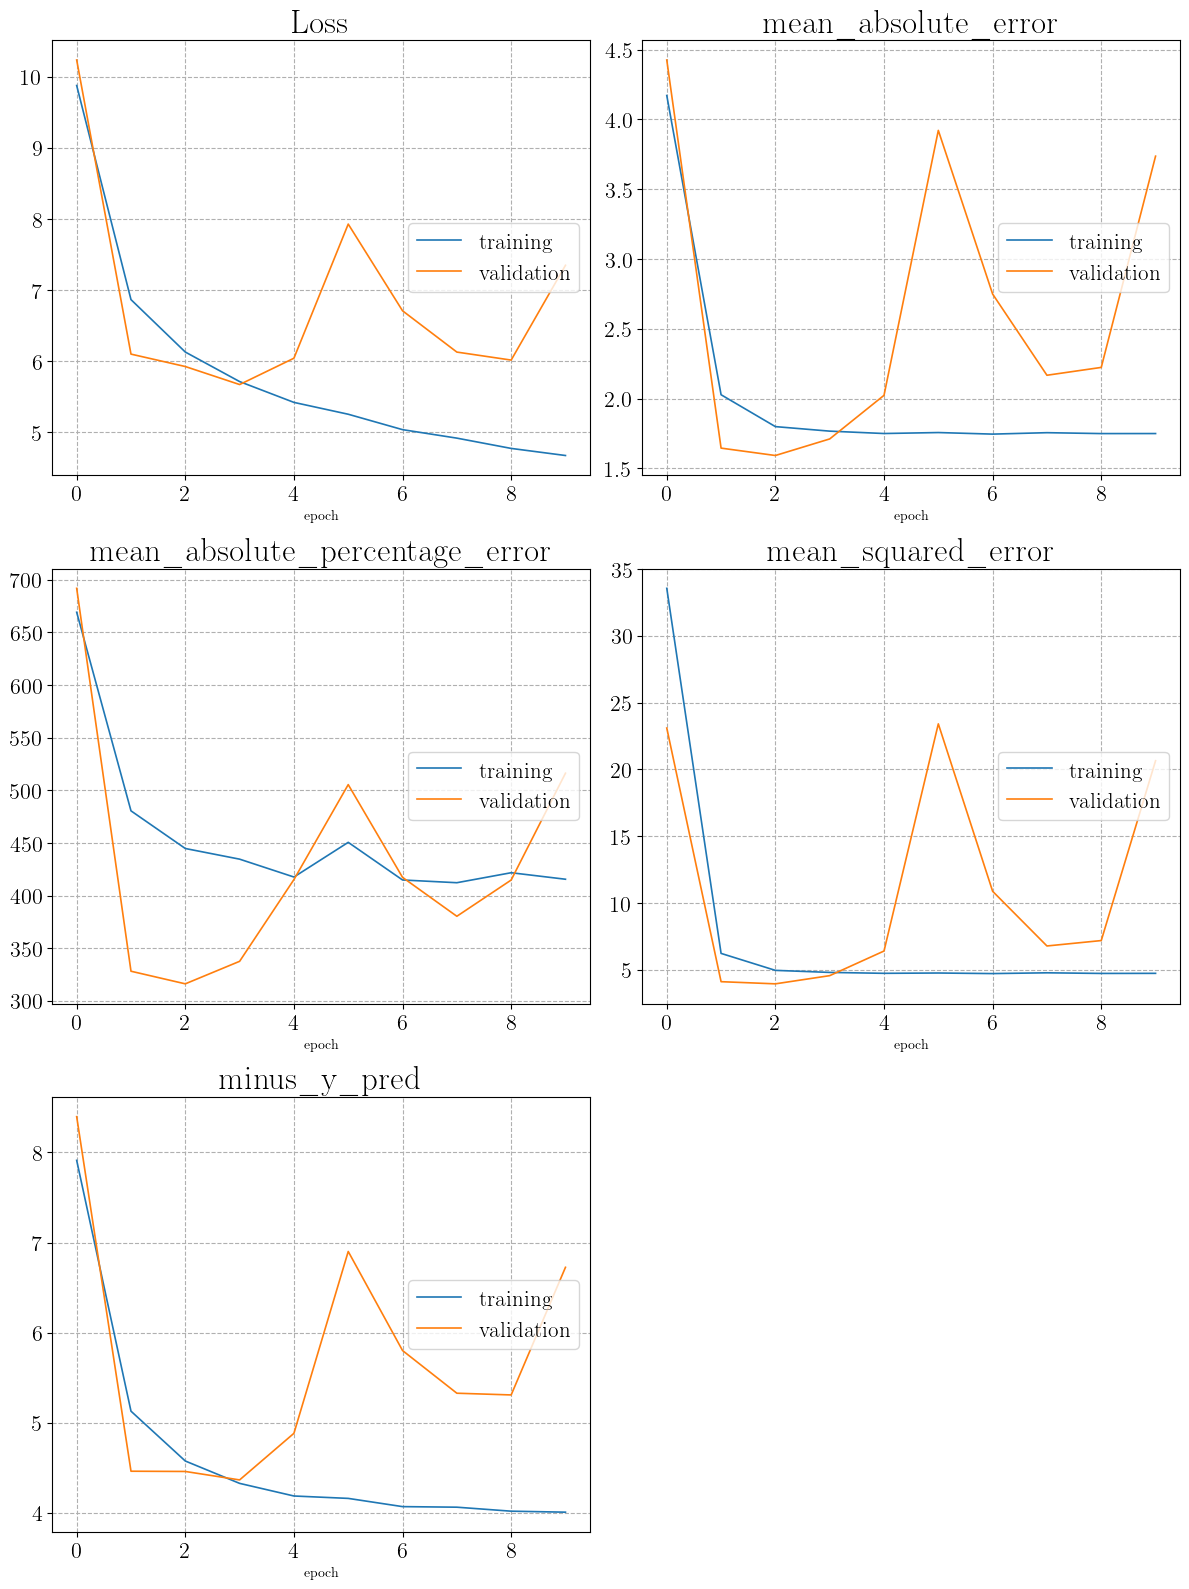

98/98 [==============================] - 12s 122ms/step - loss: 4.6733 - minus_y_pred: 4.0070 - mean_squared_error: 4.7248 - mean_absolute_error: 1.7491 - mean_absolute_percentage_error: 415.5344 - val_loss: 7.3485 - val_minus_y_pred: 6.7251 - val_mean_squared_error: 20.6477 - val_mean_absolute_error: 3.7366 - val_mean_absolute_percentage_error: 516.2736 - lr: 0.0010
No existing history. Setting new history.

Updating model.history and model.epoch attribute.

------------------------------ 
 NFMain json output file
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain.json 
updated (or saved if it did not exist) in 0.01984813599847257 s.

------------------------------ 
 NFMain json output file
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain_history.json 
updated (or saved if it did not exist) in 0.00940841599367559 s.

------------------------------ 
 NFMai

INFO:tensorflow:Assets written to: /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain_model.tf/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain_model.tf/assets


------------------------------ 
 NFMain tf output file
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain_model.tf 
updated (or saved if it did not exist) in 9.506811514991568 s.

------------------------------ 
 NFMain log output file
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain.log 
updated (or saved if it did not exist) in 0.020586900995112956 s.

NFModel nfprova_nfmain successfully trained for 10 epochs in 161.1895448710129 s ( 16.11895448710129 s/epoch).



In [15]:
NF.Trainer.model_train(reset_seed=True)

In [16]:
NF.Trainer.NFModel.weights

[<tf.Variable 'real_nvp_network_1/dense_18/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 1.64415538e-01,  1.31099656e-01, -1.76797807e-01,
         -1.15549520e-01, -6.95081130e-02,  1.26765296e-01,
         -1.98262990e-01,  1.68484092e-01,  7.82334879e-02,
         -3.36237922e-02,  1.05244964e-02,  1.45126879e-01,
          1.50811851e-01, -9.85853821e-02, -1.49445105e-02,
          8.05866718e-02, -1.60148531e-01,  2.27559954e-01,
          2.08374679e-01, -1.12237349e-01, -7.16848597e-02,
         -1.49838954e-01,  5.43584600e-02,  1.62705243e-01,
          4.09575237e-04, -1.72623739e-01,  7.43848532e-02,
          1.43462434e-01, -2.77917366e-02,  1.81895882e-01,
         -1.00131437e-01, -3.08828410e-02, -6.01074100e-02,
          7.16114417e-02,  1.33806303e-01, -1.74379036e-01,
          2.20213041e-01,  1.15234956e-01, -4.55054268e-02,
         -1.72182024e-01,  1.10064998e-01,  2.06851140e-02,
         -8.68246853e-02,  8.49736929e-02,  2.24458545e-01,
         -

In [17]:
NF.model_compile_inputs

{'loss': 'myp',
 'metrics': ['minus_y_pred', 'mse', 'mae', 'mape'],
 'run_eagerly': False}

In [18]:
NF.model_compile_inputs["loss"] = "mse"

In [19]:
NF.Trainer._NFTrainer__set_loss()

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 
Executing within strategy context: <tensorflow.python.distribute.one_device_strategy.OneDeviceStrategy object at 0x7fdea6221130> .

Setting loss

	Set loss: losses.mse .


Execution in strategy context done.
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 



In [20]:
NF.Trainer.model_compile()

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 
Executing within strategy context: <tensorflow.python.distribute.one_device_strategy.OneDeviceStrategy object at 0x7fdea6221130> .

------------------------------ 
Compiling Keras model

NFModel nfprova_nfmain compiled in 0.021536298998398706 s.


Execution in strategy context done.
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 



In [21]:
NF.Trainer.NFModel.loss

<function keras.losses.mean_squared_error(y_true, y_pred)>

In [22]:
NF.Trainer.NFModel.weights

[<tf.Variable 'real_nvp_network_1/dense_18/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 1.64415538e-01,  1.31099656e-01, -1.76797807e-01,
         -1.15549520e-01, -6.95081130e-02,  1.26765296e-01,
         -1.98262990e-01,  1.68484092e-01,  7.82334879e-02,
         -3.36237922e-02,  1.05244964e-02,  1.45126879e-01,
          1.50811851e-01, -9.85853821e-02, -1.49445105e-02,
          8.05866718e-02, -1.60148531e-01,  2.27559954e-01,
          2.08374679e-01, -1.12237349e-01, -7.16848597e-02,
         -1.49838954e-01,  5.43584600e-02,  1.62705243e-01,
          4.09575237e-04, -1.72623739e-01,  7.43848532e-02,
          1.43462434e-01, -2.77917366e-02,  1.81895882e-01,
         -1.00131437e-01, -3.08828410e-02, -6.01074100e-02,
          7.16114417e-02,  1.33806303e-01, -1.74379036e-01,
          2.20213041e-01,  1.15234956e-01, -4.55054268e-02,
         -1.72182024e-01,  1.10064998e-01,  2.06851140e-02,
         -8.68246853e-02,  8.49736929e-02,  2.24458545e-01,
         -

In [23]:
NF.Trainer.epochs_required = 20

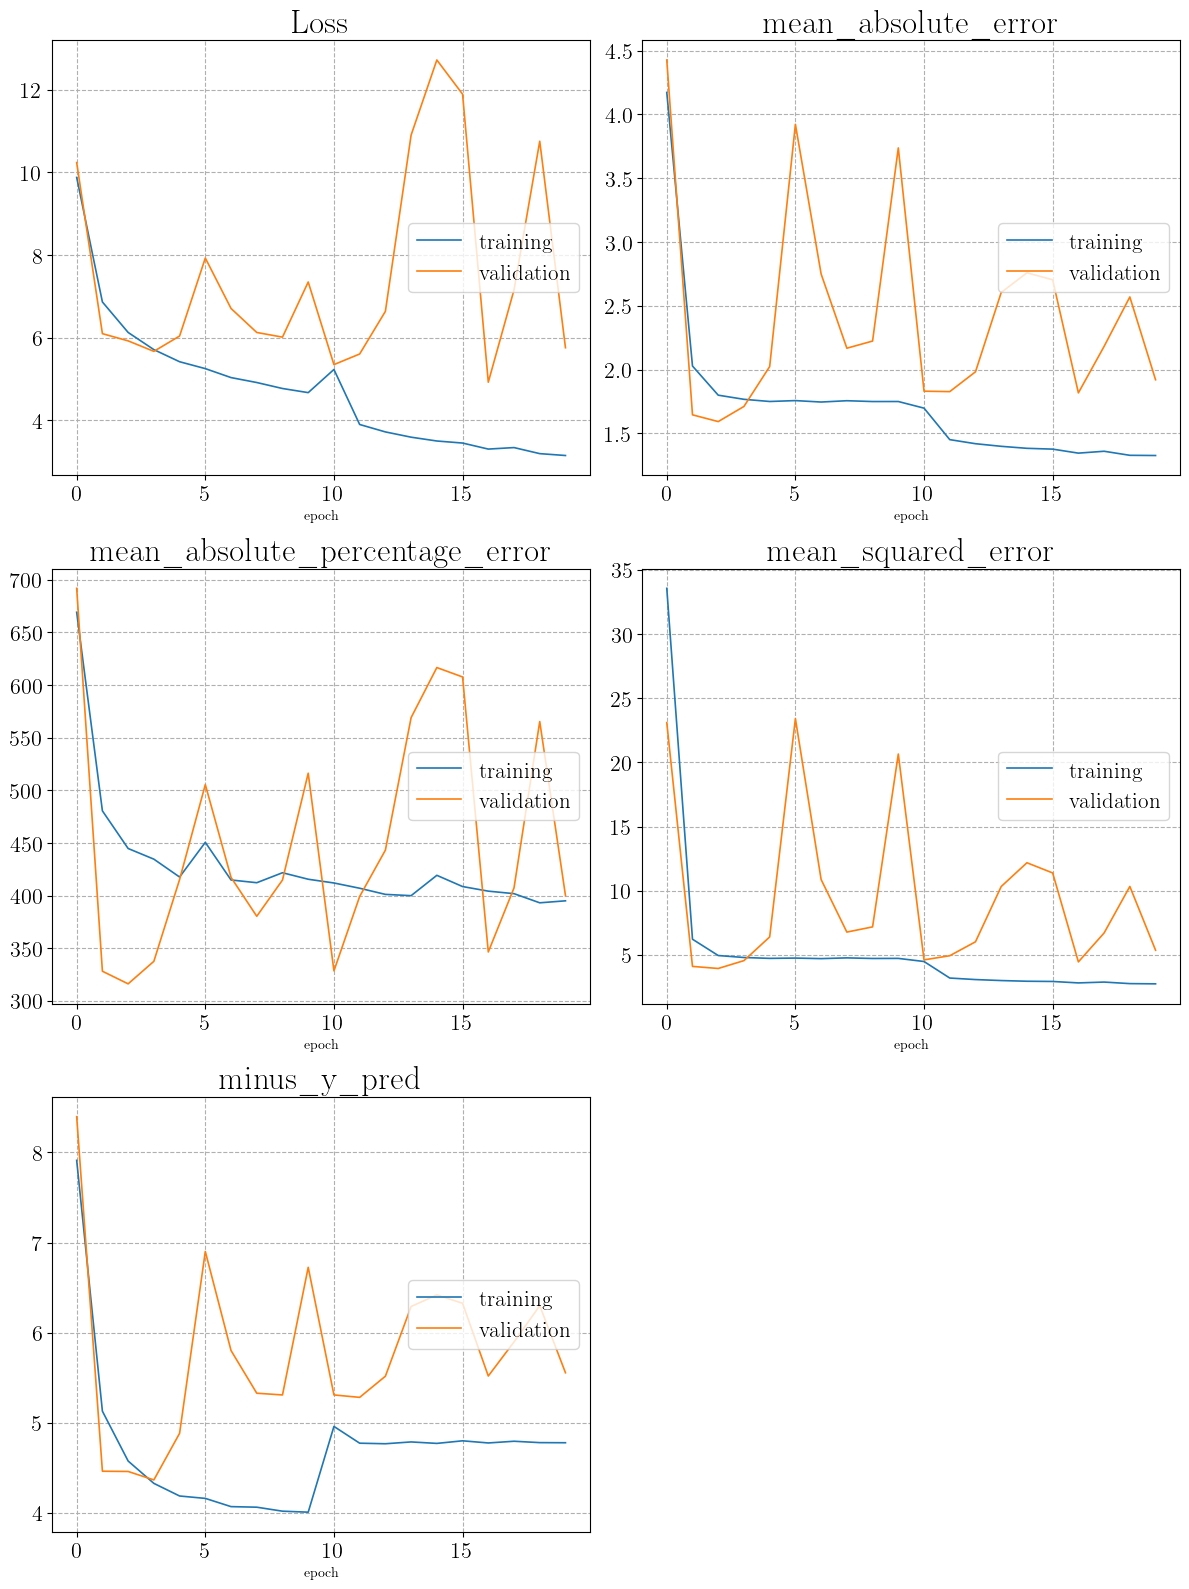

98/98 [==============================] - 12s 119ms/step - loss: 3.1527 - minus_y_pred: 4.7779 - mean_squared_error: 2.7420 - mean_absolute_error: 1.3260 - mean_absolute_percentage_error: 395.0288 - val_loss: 5.7584 - val_minus_y_pred: 5.5548 - val_mean_squared_error: 5.3631 - val_mean_absolute_error: 1.9196 - val_mean_absolute_percentage_error: 400.0826 - lr: 0.0010
Found existing history. Appending new history.

Updating model.history and model.epoch attribute.

------------------------------ 
 NFMain json output file
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain.json 
updated (or saved if it did not exist) in 0.01653617000556551 s.

------------------------------ 
 NFMain json output file
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain_history.json 
updated (or saved if it did not exist) in 0.01493008600664325 s.

------------------------------ 
 N

INFO:tensorflow:Assets written to: /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain_model.tf/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain_model.tf/assets


------------------------------ 
 NFMain tf output file
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain_model.tf 
updated (or saved if it did not exist) in 8.643188472982729 s.

------------------------------ 
 NFMain log output file
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain.log 
updated (or saved if it did not exist) in 0.020056887005921453 s.

NFModel nfprova_nfmain successfully trained for 10 epochs in 134.64787736200378 s ( 13.464787736200378 s/epoch).



In [24]:
NF.Trainer.model_train(reset_seed=False)

In [ ]:
NF.FileManager.save(overwrite=True)

------------------------------ 
 NFMain json output file
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain.json 
updated (or saved if it did not exist) in 0.017448149010306224 s.

------------------------------ 
 NFMain json output file
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain_history.json 
updated (or saved if it did not exist) in 0.011373108020052314 s.

------------------------------ 
 NFMain json output file
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain_predictions.json 
updated (or saved if it did not exist) in 0.011082454991992563 s.

------------------------------ 
 NFMain h5 output file
	 /mnt/c/Users/rtorre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NF4HEP/NFTF2_dev/prova/nf/nfprova_nfmain_predictions.h5 
updated (or saved if it did not exist) in 0.10025285099

## Check Managed Object

## Load and check NF object

In [7]:
FileManagerInput1 = NF4HEP.nf.NFFileManager(name = None,
                                            input_file = r"prova\nf\nfprova_nfmain",
                                            input_data_main_file = r"prova\data\prova_datamain",
                                            output_folder = None,
                                            load_on_RAM = True,
                                            verbose = True)

Initializing FileManager object.

------------------------------ 
Input folder set to
	 C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NF4HEP\NFTF2_dev\prova\nf .

------------------------------ 
Output folder set to
	 C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NF4HEP\NFTF2_dev\prova\nf .



In [8]:
NFInput1 = NF4HEP.nf.NFMain(file_manager = FileManagerInput1,
                            data = None,
                            base_distribution_inputs = None,
                            model_bijector_inputs = None,
                            model_chain_inputs = None,
                            model_define_inputs = None,
                            model_optimizer_inputs = None,
                            model_compile_inputs = None,
                            model_callbacks_inputs = None,
                            model_train_inputs = None,
                            resources_inputs = None,
                            seed = None,
                            verbose = 2)

Initializing NFMain object.

------------------------------ 
Setting FileManager.

Initializing Predictions.

------------------------------ 
Setting Predictions.

Initializing Figures.

------------------------------ 
Setting Figures.

------------------------------ 
Setting Data from input file.

Initializing FileManager object.

------------------------------ 
Input folder set to
	 C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NF4HEP\NFTF2_dev\prova\data .

------------------------------ 
Output folder set to
	 C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NF4HEP\NFTF2_dev\prova\data .

Initializing DataMain object.

------------------------------ 
Setting FileManager.

Initializing Predictions.

------------------------------ 
Setting Predictions.

Initializing Figures.

------------------------------ 
Setting Figures.

------------------------------ 
Loading existing DataMain object.

------------------------------ 
 <NF4HEP.inputs.dat

Initializing RealNVPBijector object.

Initializing RealNVPNetwork object.

------------------------------ 
Setting hidden layers

Added hidden layer:  layers.Dense(100,activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001))
Added hidden layer:  layers.Dense(100, activation='relu', use_bias=True, kernel_initializer=initializers.GlorotUniform(seed=None), bias_initializer='zeros', kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001), bias_regularizer=regularizers.L1(l1=0.0001), activity_regularizer=regularizers.L1(l1=0.0001), kernel_constraint=constraints.MaxNorm(max_value=2, axis=0), bias_constraint=None)
Added hidden layer:  layers.Dense(100)
Added hidden layer:  layers.Activation('relu')
Added hidden layer:  layers.Dense(100, activation='selu', kernel_initializer='lecun_normal')
Added hidden layer:  layers.Dense(100, activation='relu')
invalid syntax (<string>, line 1)
Could not add layer layers.Dense(100, use_bias=True, kerne

In [13]:
NF4HEP.utils.utils.compare_dictionaries(NF.Trainer.model_train_kwargs,NFInput1.Trainer.model_train_kwargs)

[]

In [14]:
[log, dictionary] = NFInput1.FileManager._FileManager__load_json(input_json_file = 'C:/Users/Riccardo Torre/Dropbox/Work/04_Projects/Git/GitHub/NormalizingFlows/NFTF2_dev/prova_nf/nfprova_nfmain.json', # type: ignore
                                                                 verbose = True
                                                                )

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Riccardo Torre\\Dropbox\\Work\\04_Projects\\Git\\GitHub\\NormalizingFlows\\NFTF2_dev\\prova_nf\\nfprova_nfmain.json'

In [50]:
type(dictionary['Main']['_model_bijector_inputs']['rem_dims'])

int

In [12]:
[type(x) for x in [NF.Trainer.model_train_kwargs['validation_freq'],
 NFInput1.Trainer.model_train_kwargs['validation_freq']]]

[int, numpy.int32]

In [10]:
obj1 = NF
obj2 = NFInput1

In [11]:
NF4HEP.utils.utils.compare_objects(obj1,obj2,string="NF",only_dict=False,excluded_attrs=NF.excluded_attributes+["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=1)
#print(type(dic2['_model_train_inputs']['validation_freq']))

Comparing obejects NF .
Comparing dictionaries NF .
Comparing keys NF - private attributes .
Keys NF - private attributes are dictionaries.
Comparing dictionaries NF - private attributes .
!!!!!> EXCLUDED:  NF - private attributes - _verbose_sub : Values are ["<class 'int'>", 2] and ["<class 'int'>", 2] .

!!!!!> EXCLUDED:  NF - private attributes - _Trainer : Values are ["<class 'NF4HEP.nf.NFTrainer'>", <NF4HEP.nf.NFTrainer object at 0x000002536D947D00>] and ["<class 'NF4HEP.nf.NFTrainer'>", <NF4HEP.nf.NFTrainer object at 0x000002533BF7A940>] .

!!!!!> EXCLUDED:  NF - private attributes - _Chain : Values are ["<class 'NF4HEP.bijectors.realnvp.RealNVPChain'>", <tfp.bijectors.RealNVPChain 'RealNVPChain' batch_shape=[] forward_min_event_ndims=1 inverse_min_event_ndims=1 dtype_x=? dtype_y=? bijectors=[<tfp.bijectors.RealNVPBijector 'RealNVPBijector' batch_shape=? forward_min_event_ndims=1 inverse_min_event_ndims=1 dtype_x=? dtype_y=?>, <tfp.bijectors.Permute 'permute' batch_shape=[] forwa

Comparing dictionaries NF - public methods - Chain - list entry 1 .
Comparing keys NF - public methods - Chain - list entry 1 - private attributes .
Keys NF - public methods - Chain - list entry 1 - private attributes are dictionaries.
Comparing dictionaries NF - public methods - Chain - list entry 1 - private attributes .
!!!!!> EXCLUDED:  NF - public methods - Chain - list entry 1 - private attributes - _verbose_sub : Values are ["<class 'bool'>", True] and ["<class 'bool'>", True] .

!!!!!> EXCLUDED:  NF - public methods - Chain - list entry 1 - private attributes - _verbose : Values are ["<class 'bool'>", True] and ["<class 'bool'>", True] .

Comparing keys NF - public methods - Chain - list entry 1 - private attributes - _Bijectors .
Keys NF - public methods - Chain - list entry 1 - private attributes - _Bijectors are lists, numpy arrays, or tuple.
Comparing list or arrays NF - public methods - Chain - list entry 1 - private attributes - _Bijectors .
Comparing NF - public methods 

AttributeError: 'NoneType' object has no attribute 'keys'

In [16]:
NF4HEP.utils.utils.compare_dictionaries(dic1,dic2,string="NF",only_dict=False,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=1)

Comparing dictionaries NF .
Comparing keys NF - _NFModel .
=====> DIFFERENCE:  NF - _NFModel : Values are <keras.engine.functional.Functional object at 0x000002532CA65AC0> and None .

Comparing keys NF - _Resources .
Keys NF - _Resources are objects.
Comparing obejects NF - _Resources .
Comparing dictionaries NF - _Resources .
Comparing keys NF - _Resources - private attributes .
Keys NF - _Resources - private attributes are dictionaries.
Comparing dictionaries NF - _Resources - private attributes .
-----> OK:  NF - _Resources - private attributes : Dictionaries are equal.

Comparing keys NF - _Resources - private methods .
Keys NF - _Resources - private methods are dictionaries.
Comparing dictionaries NF - _Resources - private methods .
Comparing keys NF - _Resources - private methods - _ResourcesManager__set_resources .
Keys NF - _Resources - private methods - _ResourcesManager__set_resources are lists, numpy arrays, or tuple.
Comparing list or arrays NF - _Resources - private method

NotImplementedError: must be implemented in descendants

In [15]:
dic1 = NF4HEP.utils.utils.dic_minus_keys(NF.Trainer.__dict__,NF.excluded_attributes+['_ManagedObject'])
dic2 = NF4HEP.utils.utils.dic_minus_keys(NFInput1.Trainer.__dict__,NF.excluded_attributes+['_ManagedObject'])

In [18]:
dic1.keys()

dict_keys(['_model_params', '_model_trainable_params', '_model_non_trainable_params', '_NFModel', '_training_device', '_training_time', '_history', '_model_optimizer_inputs', '_model_callbacks_inputs', '_model_compile_inputs', '_model_train_inputs', '_batch_size', '_epochs_required', '_epochs_available', '_resources_inputs', '_Resources', '_optimizer', '_optimizer_string', '_metrics_strings', '_metrics', '_callbacks_strings', '_callbacks', '_loss'])

In [17]:
NF4HEP.utils.utils.compare_dictionaries(dic1,dic2,string="Trainer",only_dict=True,excluded_attrs=["_ManagedObject","ManagedObject"],strong_exclusion=True,verbose=1)

Comparing dictionaries Trainer .
Comparing keys Trainer - _NFModel .
=====> DIFFERENCE:  Trainer - _NFModel : Values are <keras.engine.functional.Functional object at 0x000002532CA65AC0> and None .

Comparing keys Trainer - _Resources .
Keys Trainer - _Resources are objects.
Comparing obejects Trainer - _Resources .
Comparing dictionaries Trainer - _Resources .
-----> OK:  Trainer - _Resources : Dictionaries are equal.

Comparing keys Trainer - _batch_size .
-----> OK:  Trainer - _batch_size : Values are equal.

Comparing keys Trainer - _callbacks .
Keys Trainer - _callbacks are lists, numpy arrays, or tuple.
Comparing list or arrays Trainer - _callbacks .
Comparing Trainer - _callbacks - list entry 0 .
Items Trainer - _callbacks - list entry 0 are objects.
Comparing obejects Trainer - _callbacks - list entry 0 .
Comparing dictionaries Trainer - _callbacks - list entry 0 .
=====> DIFFERENCE:  Trainer - _callbacks - list entry 0 : Keys ['params', 'best_epoch', 'best'] are in dict1 but n

[['Trainer - _NFModel',
  None],
 ['Trainer - _callbacks - list entry 0',
  ['_chief_worker_only',
   '_supports_tf_logs',
   'baseline',
   'best',
   'best_epoch',
   'best_weights',
   'min_delta',
   'model',
   'monitor',
   'monitor_op',
   'params',
   'patience',
   'restore_best_weights',
   'start_from_epoch',
   'stopped_epoch',
   'validation_data',
   'verbose',
   'wait'],
  ['_chief_worker_only',
   '_supports_tf_logs',
   'baseline',
   'best_weights',
   'min_delta',
   'model',
   'monitor',
   'monitor_op',
   'patience',
   'restore_best_weights',
   'start_from_epoch',
   'stopped_epoch',
   'validation_data',
   'verbose',
   'wait']],
 ['Trainer - _callbacks - list entry 0 - best_weights',
  [array([[ 2.38735465e-05, -1.55980557e-01,  9.21250135e-02,
            1.12459893e-05, -1.40118539e-01, -1.11791492e-01,
           -1.57609761e-01,  1.95385188e-01, -1.40547976e-01,
            1.24944910e-01, -4.85811308e-02, -4.55641262e-02,
           -1.05402537e-01, -5

In [18]:
NFInput1.Trainer.model_train()
#NFInput1.Trainer.NFModel

------------------------------ 
Training Keras model

Required a total of 10 epochs. 0 epochs already available. Training for a maximum of 10 epochs.

------------------------------ 
Generating train/val data corresponding to randomly generated indices.

------------------------------ 
Loaded required data from dataset.

------------------------------ 
Loaded required data from dataset.

------------------------------ 
Generated/loaded 50000 (X_train, Y_train) data and  30000 (X_val, Y_val) data in 0.03566210000008141 s.

------------------------------ 
Standard scalers defined in 0.013474500000029366 s.

------------------------------ 
Matrix that rotates the correlation matrix defined in 0.005423000000064349 s.

Start training of NFModel nfprova_nfmain .



AttributeError: 'NoneType' object has no attribute 'fit'

## Attributes and methods

In [4]:
attrs = sorted(NF.__dict__,key=str.lower)
attrs

['_NF__model_base_dist_inputs',
 '_NF__model_callbacks_inputs',
 '_NF__model_compile_inputs',
 '_NF__model_data_inputs',
 '_NF__model_define_inputs',
 '_NF__model_flow_inputs',
 '_NF__model_optimizer_inputs',
 '_NF__model_train_inputs',
 '_NF__resources_inputs',
 'active_gpus',
 'available_cpu',
 'available_gpus',
 'base_distribution',
 'base_distribution_string',
 'batch_norm',
 'batch_size',
 'Bijector',
 'callbacks',
 'callbacks_strings',
 'data',
 'dtype',
 'ensemble_folder',
 'ensemble_name',
 'epochs_available',
 'epochs_required',
 'Flow',
 'flow_type',
 'gpu_mode',
 'history',
 'idx_test',
 'idx_train',
 'idx_val',
 'input_data_file',
 'input_file',
 'input_folder',
 'input_h5_file',
 'input_history_json_file',
 'input_idx_h5_file',
 'input_log_file',
 'input_predictions_h5_file',
 'input_preprocessing_pickle_file',
 'input_tf_model_h5_file',
 'load_on_RAM',
 'log',
 'log_prob',
 'metrics',
 'metrics_string',
 'model',
 'model_compile_kwargs',
 'model_train_kwargs',
 'name',
 '

In [26]:
{x: NF.__dict__[x] for x in attrs}

{'_NF__model_base_dist_inputs': {'default_dist': 'Normal',
  'tf_dist': None,
  'ndims': 3},
 '_NF__model_callbacks_inputs': [{'name': 'EarlyStopping',
   'args': [],
   'kwargs': {'monitor': 'val_loss',
    'mode': 'min',
    'patience': 100,
    'min_delta': 0.0001,
    'restore_best_weights': True}},
  'TerminateOnNaN',
  {'name': 'ReduceLROnPlateau',
   'args': [],
   'kwargs': {'monitor': 'val_loss',
    'mode': 'min',
    'factor': 0.2,
    'min_lr': 8e-05,
    'patience': 10,
    'min_delta': 0.0001}}],
 '_NF__model_compile_inputs': {'metrics': ['kullback_leibler_divergence',
   {'name': 'BinaryCrossentropy',
    'kwargs': {'from_logits': False, 'label_smoothing': 0}}]},
 '_NF__model_data_inputs': {'npoints': [5000, 1000, 1000],
  'scalerX': False,
  'rotationX': False},
 '_NF__model_define_inputs': {'params': 2,
  'event_shape': None,
  'conditional': False,
  'conditional_event_shape': None,
  'conditional_input_layers': 'all_layers',
  'hidden_units': [64, 64],
  'input_order

In [5]:
[func for func in dir(NF) if callable(getattr(NF, func)) and not func.startswith("__")]

['_NF__check_define_ensemble_folder',
 '_NF__check_define_input_files',
 '_NF__check_define_model_base_dist_inputs',
 '_NF__check_define_model_compile_inputs',
 '_NF__check_define_model_data_inputs',
 '_NF__check_define_model_define_inputs',
 '_NF__check_define_model_flow_inputs',
 '_NF__check_define_model_train_inputs',
 '_NF__check_define_name',
 '_NF__check_define_output_files',
 '_NF__check_npoints',
 '_NF__load_data_indices',
 '_NF__load_history',
 '_NF__load_json_and_log',
 '_NF__load_model',
 '_NF__load_predictions',
 '_NF__load_preprocessing',
 '_NF__set_base_distriburion',
 '_NF__set_callbacks',
 '_NF__set_data',
 '_NF__set_dtype',
 '_NF__set_epochs_to_run',
 '_NF__set_metrics',
 '_NF__set_model_hyperparameters',
 '_NF__set_optimizer',
 '_NF__set_pars_info',
 '_NF__set_pars_labels',
 '_NF__set_resources',
 '_NF__set_seed',
 '_NF__set_tf_objects',
 'check_tf_gpu',
 'check_x_bounds',
 'define_rotation',
 'define_scaler',
 'generate_fig_base_title',
 'generate_summary_text',
 'ge

## Usage

In [ ]:
try:
    NF
except:
    NF = NF4HEP.NF(input_data_file="tutorials/toy_mixture_3D/data/data",
                      load_on_RAM=True,un
                      input_file="tutorials/toy_mixture_3D/maf_1/prova",
                      verbose=2)
    NF.generate_train_data()
    NF.generate_test_data()
    NF.model_compile(verbose=2)

In [ ]:
#NF.base_distribution_string
#NF.base_distribution

In [10]:
NF.generate_train_data(verbose=2)
NF.generate_test_data(verbose=2)
#NF.data.data_dictionary
#NF.X_train

Generating train/validation data

Data log file
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\data\data.log 
updated (or saved if it did not exist) in 0.001118199999979197 s.

Added 50000 X_train samples and 10000 X_val samples in 0.019366399999995565 s.

Defining data rotation

Data log file
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\data\data.log 
updated (or saved if it did not exist) in 0.0013854000000037558 s.

Matrix that rotates the correlation matrix defined in 5.289999998581152e-05 s.

Setting standard scalers

Data log file
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\data\data.log 
updated (or saved if it did not exist) in 0.0019443000000194388 s.

Standard scaler defined in 0.006622600000014245 s.

NF log file
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources

In [11]:
NF.model_define_bijector(verbose=2)
#NF.NN
#NF.Bijector
#NF.Flow

Setting the Normalizing Flow Bijector

NF log file
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\maf_1\maf_1.log 
updated (or saved if it did not exist) in 0.0011514000000261149 s.

Bijector for Normalizing Flow maf_1 defined in 0.017894399999988764 s.



In [12]:
NF.model_define(verbose=2)

Defining Keras model

NF log file
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\maf_1\maf_1.log 
updated (or saved if it did not exist) in 0.002093000000002121 s.

Model for Normalizing Flow maf_1 defined in 0.6933048999999869 s.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 tf.convert_to_tensor (TFOpLamb  (None, 10)          0           ['input_1[0][0]']                
 da)                                                                                              
                                                                                         

In [13]:
NF.model_compile(verbose=2)

Compiling Keras model

NF log file
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\maf_1\maf_1.log 
updated (or saved if it did not exist) in 0.0026355999999623236 s.

Model for Normalizing Flow maf_1 compiled in 0.019346299999995153 s.



In [14]:
NF.model_build(verbose=2)

Defining and compiling Keras model

Model already built.


In [15]:
NF.model_train(verbose=2)

Training Keras model

Required a total of 500 epochs. 0 epochs already available. Training for a maximum of 500 epochs.

Scaling training/val data.

Start training of model for Normalizing Flow maf_1 .

Epoch 1/500
98/98 - 5s - loss: 23.0646 - val_loss: 18.1861 - lr: 0.0010 - 5s/epoch - 52ms/step
Epoch 2/500
98/98 - 1s - loss: 16.3226 - val_loss: 14.6609 - lr: 0.0010 - 1s/epoch - 14ms/step
Epoch 3/500
98/98 - 1s - loss: 13.6153 - val_loss: 12.9327 - lr: 0.0010 - 1s/epoch - 15ms/step
Epoch 4/500
98/98 - 1s - loss: 12.5520 - val_loss: 12.1912 - lr: 0.0010 - 1s/epoch - 15ms/step
Epoch 5/500
98/98 - 1s - loss: 11.9172 - val_loss: 11.6907 - lr: 0.0010 - 1s/epoch - 15ms/step
Epoch 6/500
98/98 - 1s - loss: 11.5506 - val_loss: 11.4361 - lr: 0.0010 - 1s/epoch - 13ms/step
Epoch 7/500
98/98 - 1s - loss: 11.3707 - val_loss: 11.3119 - lr: 0.0010 - 1s/epoch - 13ms/step
Epoch 8/500
98/98 - 1s - loss: 11.2848 - val_loss: 11.2574 - lr: 0.0010 - 1s/epoch - 14ms/step
Epoch 9/500
98/98 - 2s - loss: 11.241

Epoch 84/500
98/98 - 1s - loss: 10.7501 - val_loss: 10.7924 - lr: 0.0010 - 1s/epoch - 14ms/step
Epoch 85/500
98/98 - 1s - loss: 10.7324 - val_loss: 10.7188 - lr: 0.0010 - 1s/epoch - 15ms/step
Epoch 86/500
98/98 - 1s - loss: 10.7270 - val_loss: 10.7405 - lr: 0.0010 - 1s/epoch - 14ms/step
Epoch 87/500
98/98 - 1s - loss: 10.7238 - val_loss: 10.7471 - lr: 0.0010 - 1s/epoch - 14ms/step
Epoch 88/500
98/98 - 1s - loss: 10.7268 - val_loss: 10.7031 - lr: 0.0010 - 1s/epoch - 14ms/step
Epoch 89/500
98/98 - 1s - loss: 10.7153 - val_loss: 10.7561 - lr: 0.0010 - 1s/epoch - 13ms/step
Epoch 90/500
98/98 - 1s - loss: 10.7227 - val_loss: 10.7179 - lr: 0.0010 - 1s/epoch - 13ms/step
Epoch 91/500
98/98 - 1s - loss: 10.6982 - val_loss: 10.6952 - lr: 0.0010 - 1s/epoch - 12ms/step
Epoch 92/500
98/98 - 1s - loss: 10.7013 - val_loss: 10.7011 - lr: 0.0010 - 1s/epoch - 13ms/step
Epoch 93/500
98/98 - 1s - loss: 10.6912 - val_loss: 10.7723 - lr: 0.0010 - 1s/epoch - 13ms/step
Epoch 94/500
98/98 - 1s - loss: 10.6987 

Epoch 168/500
98/98 - 1s - loss: 10.5392 - val_loss: 10.5475 - lr: 2.0000e-04 - 1s/epoch - 13ms/step
Epoch 169/500
98/98 - 1s - loss: 10.5352 - val_loss: 10.5460 - lr: 2.0000e-04 - 1s/epoch - 13ms/step
Epoch 170/500
98/98 - 1s - loss: 10.5328 - val_loss: 10.5448 - lr: 2.0000e-04 - 1s/epoch - 14ms/step
Epoch 171/500
98/98 - 1s - loss: 10.5364 - val_loss: 10.5461 - lr: 2.0000e-04 - 1s/epoch - 14ms/step
Epoch 172/500
98/98 - 1s - loss: 10.5373 - val_loss: 10.5419 - lr: 2.0000e-04 - 1s/epoch - 13ms/step
Epoch 173/500
98/98 - 1s - loss: 10.5373 - val_loss: 10.5439 - lr: 2.0000e-04 - 1s/epoch - 14ms/step
Epoch 174/500
98/98 - 1s - loss: 10.5364 - val_loss: 10.5393 - lr: 2.0000e-04 - 1s/epoch - 13ms/step
Epoch 175/500
98/98 - 1s - loss: 10.5330 - val_loss: 10.5373 - lr: 2.0000e-04 - 1s/epoch - 13ms/step
Epoch 176/500
98/98 - 1s - loss: 10.5344 - val_loss: 10.5412 - lr: 2.0000e-04 - 1s/epoch - 14ms/step
Epoch 177/500
98/98 - 1s - loss: 10.5330 - val_loss: 10.5542 - lr: 2.0000e-04 - 1s/epoch - 

98/98 - 1s - loss: 10.5062 - val_loss: 10.5153 - lr: 8.0000e-05 - 1s/epoch - 14ms/step
Epoch 250/500
98/98 - 1s - loss: 10.5054 - val_loss: 10.5173 - lr: 8.0000e-05 - 1s/epoch - 15ms/step
Epoch 251/500
98/98 - 1s - loss: 10.5068 - val_loss: 10.5184 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoch 252/500
98/98 - 1s - loss: 10.5067 - val_loss: 10.5134 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoch 253/500
98/98 - 1s - loss: 10.5062 - val_loss: 10.5331 - lr: 8.0000e-05 - 1s/epoch - 14ms/step
Epoch 254/500
98/98 - 1s - loss: 10.5081 - val_loss: 10.5172 - lr: 8.0000e-05 - 1s/epoch - 12ms/step
Epoch 255/500
98/98 - 1s - loss: 10.5076 - val_loss: 10.5327 - lr: 8.0000e-05 - 1s/epoch - 12ms/step
Epoch 256/500
98/98 - 1s - loss: 10.5073 - val_loss: 10.5169 - lr: 8.0000e-05 - 1s/epoch - 12ms/step
Epoch 257/500
98/98 - 1s - loss: 10.5066 - val_loss: 10.5166 - lr: 8.0000e-05 - 1s/epoch - 12ms/step
Epoch 258/500
98/98 - 1s - loss: 10.5064 - val_loss: 10.5174 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoc

Epoch 331/500
98/98 - 1s - loss: 10.4944 - val_loss: 10.5027 - lr: 8.0000e-05 - 1s/epoch - 12ms/step
Epoch 332/500
98/98 - 1s - loss: 10.4929 - val_loss: 10.5112 - lr: 8.0000e-05 - 1s/epoch - 12ms/step
Epoch 333/500
98/98 - 1s - loss: 10.4916 - val_loss: 10.5037 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoch 334/500
98/98 - 1s - loss: 10.4912 - val_loss: 10.4972 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoch 335/500
98/98 - 1s - loss: 10.4913 - val_loss: 10.5040 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoch 336/500
98/98 - 1s - loss: 10.4929 - val_loss: 10.4995 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoch 337/500
98/98 - 1s - loss: 10.4914 - val_loss: 10.5044 - lr: 8.0000e-05 - 1s/epoch - 14ms/step
Epoch 338/500
98/98 - 1s - loss: 10.4906 - val_loss: 10.4991 - lr: 8.0000e-05 - 1s/epoch - 12ms/step
Epoch 339/500
98/98 - 1s - loss: 10.4908 - val_loss: 10.4974 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoch 340/500
98/98 - 1s - loss: 10.4914 - val_loss: 10.5018 - lr: 8.0000e-05 - 1s/epoch - 

98/98 - 1s - loss: 10.4803 - val_loss: 10.4873 - lr: 8.0000e-05 - 1s/epoch - 15ms/step
Epoch 413/500
98/98 - 1s - loss: 10.4802 - val_loss: 10.4979 - lr: 8.0000e-05 - 1s/epoch - 14ms/step
Epoch 414/500
98/98 - 1s - loss: 10.4806 - val_loss: 10.4877 - lr: 8.0000e-05 - 1s/epoch - 15ms/step
Epoch 415/500
98/98 - 1s - loss: 10.4794 - val_loss: 10.4877 - lr: 8.0000e-05 - 1s/epoch - 15ms/step
Epoch 416/500
98/98 - 1s - loss: 10.4811 - val_loss: 10.4891 - lr: 8.0000e-05 - 1s/epoch - 12ms/step
Epoch 417/500
98/98 - 1s - loss: 10.4784 - val_loss: 10.4864 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoch 418/500
98/98 - 1s - loss: 10.4801 - val_loss: 10.4951 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoch 419/500
98/98 - 1s - loss: 10.4780 - val_loss: 10.4865 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoch 420/500
98/98 - 1s - loss: 10.4793 - val_loss: 10.4854 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoch 421/500
98/98 - 1s - loss: 10.4783 - val_loss: 10.4889 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoc

Epoch 494/500
98/98 - 1s - loss: 10.4693 - val_loss: 10.4865 - lr: 8.0000e-05 - 1s/epoch - 11ms/step
Epoch 495/500
98/98 - 1s - loss: 10.4697 - val_loss: 10.4757 - lr: 8.0000e-05 - 1s/epoch - 11ms/step
Epoch 496/500
98/98 - 1s - loss: 10.4671 - val_loss: 10.4744 - lr: 8.0000e-05 - 1s/epoch - 11ms/step
Epoch 497/500
98/98 - 1s - loss: 10.4683 - val_loss: 10.4739 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoch 498/500
98/98 - 1s - loss: 10.4689 - val_loss: 10.4753 - lr: 8.0000e-05 - 1s/epoch - 13ms/step
Epoch 499/500
98/98 - 1s - loss: 10.4721 - val_loss: 10.4784 - lr: 8.0000e-05 - 1s/epoch - 14ms/step
Epoch 500/500
98/98 - 1s - loss: 10.4693 - val_loss: 10.4785 - lr: 8.0000e-05 - 1s/epoch - 14ms/step
No existing history. Setting new history.

Updating model.history and model.epoch attribute.

NF log file
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\maf_1\maf_1.log 
updated (or saved if it did not exist) in 0.003083899

In [16]:
NF.save(overwrite=True)

Idx h5 file
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\maf_1\maf_1_idx.h5 
updated (or saved if it did not exist) in 0.004649299999982759 s.

Model weights h5 file
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\maf_1\maf_1_model_weights.h5 
updated (or saved if it did not exist) in 0.047375100000067505 s.

Model history file
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\maf_1\maf_1_history.json 
updated (or saved if it did not exist) in 0.008200099999953636 s.

Predictions json file
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\maf_1\maf_1_predictions.json 
updated (or saved if it did not exist) in 0.0016726000000062413 s.

Predictions h5 file
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub

## Predictions

## Load and check loaded object

In [11]:
NF_loaded = NF4HEP.NF(input_data_file="tutorials/toy_mixture_3D/data/data",
                      load_on_RAM=True,
                      input_file="tutorials/toy_mixture_3D/maf_1/prova",
                      verbose=2)
NF_loaded.generate_train_data()
NF_loaded.generate_test_data()
NF_loaded.model_compile(verbose=2)

============================== \Input folder set to
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\maf_1 .

When providing NF input folder all arguments but data, load_on_RAM, and dtype are ignored and the object is constructed from saved data.
NF json and log files loaded in 0.002370900000002507 .

NF output folder set to
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\maf_1 .

88 CPU cores available
1 GPUs available
1 GPU has been set:
['/device:GPU:0', 'device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:86:00.0, compute capability: 7.5'] .
Initialize Data object.

Data input folder set to
	 C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\dev_new\tutorials\toy_mixture_3D\data .

Data object loaded in 0.012977199999994582 .

Samples loaded on RAM.

Data output folder set to
	 C:\Users\Riccardo Torre\Drop

In [22]:
dict1 = NF4HEP.utils.dic_minus_keys(NF.__dict__,["Flow","Bijector","NN","log_prob","trainable_distribution","model","loss"])
dict2 = NF4HEP.utils.dic_minus_keys(NF_loaded.__dict__,["Flow","Bijector","NN","log_prob","trainable_distribution","model","loss"])
[diffs, memdiffs] = NF4HEP.utils.compare_dictionaries(dict1,dict2,"NF object without flow objects",verbose=-1)

MEMORY DIFFERENCE:  NF object without flow objects - base_distribution - _distribution - _name_scope .

MEMORY DIFFERENCE:  NF object without flow objects - base_distribution - _name_scope .

MEMORY DIFFERENCE:  NF object without flow objects - base_distribution - _parameters - distribution - _name_scope .

MEMORY DIFFERENCE:  NF object without flow objects - base_distribution - _self_unconditional_checkpoint_dependencies - list entry 0 .

MEMORY DIFFERENCE:  NF object without flow objects - base_distribution - _self_unconditional_dependency_names - _distribution - _name_scope .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 : Keys ['best', 'params', 'best_epoch'] are in dict1 but not in dict2.

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights : Values are [array([[-0.19388893,  0.23848848,  0.01695501, -0.0209637 , -0.12200904,
         0.0840157 ,  0.21291384, -0.03856186,  0.09621549,  0.04566146,
         0.0771064 ,  0.

In [24]:
NF.callbacks[0].__dict__

{'validation_data': None,
 'model': <keras.engine.functional.Functional at 0x1bd30834c10>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'monitor': 'val_loss',
 'patience': 100,
 'verbose': 0,
 'baseline': None,
 'min_delta': -0.0001,
 'wait': 2,
 'stopped_epoch': 0,
 'restore_best_weights': True,
 'best_weights': [array([[-0.19332327,  0.2377449 ,  0.01585675, -0.01928173, -0.12126824,
           0.08417139,  0.2055246 , -0.03875455,  0.09621603,  0.04771782,
           0.07791031,  0.02196759,  0.22408159,  0.07552873,  0.01649124,
          -0.27898797, -0.11823396, -0.11932787,  0.22437912,  0.2160461 ,
           0.16807742, -0.22057456, -0.25077167, -0.11683293, -0.12292287,
           0.2411208 , -0.02369166, -0.15320367,  0.06993107,  0.05001788,
           0.2234445 ,  0.02221423, -0.00956907,  0.05483824,  0.03005501,
          -0.03599424, -0.1238054 ,  0.12476549,  0.25468314,  0.10456249,
          -0.16864873, -0.21315221, -0.05878485, -0.2925661 , -0.0068442

In [25]:
NF_loaded.callbacks[0].__dict__

{'validation_data': None,
 'model': <keras.engine.functional.Functional at 0x1bf89ffcd90>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'monitor': 'val_loss',
 'patience': 100,
 'verbose': 0,
 'baseline': None,
 'min_delta': -0.0001,
 'wait': 1,
 'stopped_epoch': 0,
 'restore_best_weights': True,
 'best_weights': [array([[-0.19019425,  0.23031314,  0.01386428, -0.01824968, -0.11330652,
           0.07993291,  0.20339914, -0.03180985,  0.09274866,  0.04365183,
           0.07558709,  0.01677135,  0.21441925,  0.07502507,  0.01081165,
          -0.26963642, -0.11546719, -0.10918952,  0.21853414,  0.21023007,
           0.15928061, -0.21280752, -0.24130504, -0.11370495, -0.11768061,
           0.23580936, -0.02577363, -0.15284745,  0.06808377,  0.04740749,
           0.21722715,  0.01969554, -0.01008858,  0.04867626,  0.03221442,
          -0.03345161, -0.1153392 ,  0.1242299 ,  0.25200996,  0.10228179,
          -0.16619177, -0.21024448, -0.05539482, -0.28362682, -0.0054908

In [15]:
NF.epochs_required = 100
NF_loaded.epochs_required = 100

In [16]:
NF.model_train(verbose=2)
NF_loaded.model_train(verbose=2)

Training Keras model

Required a total of 100 epochs. 50 epochs already available. Training for a maximum of 50 epochs.

Scaling training/val data.

Start training of model for Normalizing Flow prova .

Epoch 51/100
10/10 - 1s - loss: 3.5097 - val_loss: 3.4929 - lr: 0.0010 - 584ms/epoch - 58ms/step
Epoch 52/100
10/10 - 0s - loss: 3.5085 - val_loss: 3.4910 - lr: 0.0010 - 227ms/epoch - 23ms/step
Epoch 53/100
10/10 - 0s - loss: 3.5075 - val_loss: 3.4898 - lr: 0.0010 - 169ms/epoch - 17ms/step
Epoch 54/100
10/10 - 0s - loss: 3.5058 - val_loss: 3.4892 - lr: 0.0010 - 202ms/epoch - 20ms/step
Epoch 55/100
10/10 - 0s - loss: 3.5040 - val_loss: 3.4887 - lr: 0.0010 - 212ms/epoch - 21ms/step
Epoch 56/100
10/10 - 0s - loss: 3.5034 - val_loss: 3.4874 - lr: 0.0010 - 174ms/epoch - 17ms/step
Epoch 57/100
10/10 - 0s - loss: 3.5021 - val_loss: 3.4864 - lr: 0.0010 - 168ms/epoch - 17ms/step
Epoch 58/100
10/10 - 0s - loss: 3.5017 - val_loss: 3.4855 - lr: 0.0010 - 163ms/epoch - 16ms/step
Epoch 59/100
10/10 - 

Epoch 76/100
10/10 - 0s - loss: 3.4666 - val_loss: 3.4493 - lr: 0.0010 - 212ms/epoch - 21ms/step
Epoch 77/100
10/10 - 0s - loss: 3.4654 - val_loss: 3.4535 - lr: 0.0010 - 236ms/epoch - 24ms/step
Epoch 78/100
10/10 - 0s - loss: 3.4645 - val_loss: 3.4472 - lr: 0.0010 - 222ms/epoch - 22ms/step
Epoch 79/100
10/10 - 0s - loss: 3.4623 - val_loss: 3.4519 - lr: 0.0010 - 204ms/epoch - 20ms/step
Epoch 80/100
10/10 - 0s - loss: 3.4621 - val_loss: 3.4442 - lr: 0.0010 - 203ms/epoch - 20ms/step
Epoch 81/100
10/10 - 0s - loss: 3.4594 - val_loss: 3.4429 - lr: 0.0010 - 207ms/epoch - 21ms/step
Epoch 82/100
10/10 - 0s - loss: 3.4585 - val_loss: 3.4445 - lr: 0.0010 - 201ms/epoch - 20ms/step
Epoch 83/100
10/10 - 0s - loss: 3.4580 - val_loss: 3.4472 - lr: 0.0010 - 235ms/epoch - 24ms/step
Epoch 84/100
10/10 - 0s - loss: 3.4614 - val_loss: 3.4438 - lr: 0.0010 - 211ms/epoch - 21ms/step
Epoch 85/100
10/10 - 0s - loss: 3.4618 - val_loss: 3.4439 - lr: 0.0010 - 209ms/epoch - 21ms/step
Epoch 86/100
10/10 - 0s - loss

In [19]:
import tensorflow as tf
tf.keras.models.save_model(NF.model, NF.output_tf_model_weights_h5_file)

NotImplementedError: 
Layer AutoregressiveNetwork has arguments ['self', 'params', 'event_shape', 'conditional', 'conditional_event_shape', 'conditional_input_layers', 'hidden_units', 'input_order', 'hidden_degrees', 'activation', 'use_bias', 'kernel_initializer', 'bias_initializer', 'kernel_regularizer', 'bias_regularizer', 'kernel_constraint', 'bias_constraint', 'validate_args']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config

In [18]:
NF.model.save(NF.output_tf_model_weights_h5_file)

NotImplementedError: 
Layer AutoregressiveNetwork has arguments ['self', 'params', 'event_shape', 'conditional', 'conditional_event_shape', 'conditional_input_layers', 'hidden_units', 'input_order', 'hidden_degrees', 'activation', 'use_bias', 'kernel_initializer', 'bias_initializer', 'kernel_regularizer', 'bias_regularizer', 'kernel_constraint', 'bias_constraint', 'validate_args']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config

In [17]:
dict1 = NF4HEP.utils.dic_minus_keys(NF.__dict__,["Flow","Bijector","NN","log_prob","trainable_distribution","model","loss"])
dict2 = NF4HEP.utils.dic_minus_keys(NF_loaded.__dict__,["Flow","Bijector","NN","log_prob","trainable_distribution","model","loss"])
[diffs, memdiffs] = NF4HEP.utils.compare_dictionaries(dict1,dict2,"NF object without flow objects",verbose=-1)

MEMORY DIFFERENCE:  NF object without flow objects - base_distribution - _distribution - _name_scope .

MEMORY DIFFERENCE:  NF object without flow objects - base_distribution - _name_scope .

MEMORY DIFFERENCE:  NF object without flow objects - base_distribution - _parameters - distribution - _name_scope .

MEMORY DIFFERENCE:  NF object without flow objects - base_distribution - _self_unconditional_checkpoint_dependencies - list entry 0 .

MEMORY DIFFERENCE:  NF object without flow objects - base_distribution - _self_unconditional_dependency_names - _distribution - _name_scope .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best : Values are 3.4634125232696533 and 3.4285848140716553 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_epoch : Values are 97 and 98 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 0 - list entry 0 - list entry 0 : Values are -0.19332327 and -0.1901

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 1 - list entry 49 : Values are -0.008971608 and -0.015535987 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 1 - list entry 50 : Values are 0.015176374 and 0.015375147 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 1 - list entry 51 : Values are 0.05525622 and 0.05925743 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 1 - list entry 52 : Values are 0.022760948 and 0.025533225 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 1 - list entry 53 : Values are -0.01388746 and -0.005258415 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 1 - list entry 54 : Values are -0.08534089 and -0.08420061 .

DIFFERENCE:  NF object without fl

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 2 - list entry 48 : Values are -0.11802725 and -0.12078671 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 2 - list entry 49 : Values are -0.13862799 and -0.1408848 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 2 - list entry 50 : Values are -0.00818769 and -0.00790412 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 2 - list entry 51 : Values are 0.21533176 and 0.2153468 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 2 - list entry 52 : Values are -0.18453 and -0.18606995 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 2 - list entr

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 5 - list entry 56 : Values are -0.206307 and -0.20478101 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 5 - list entry 57 : Values are 0.03756872 and 0.040338956 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 5 - list entry 58 : Values are -0.05645798 and -0.053979058 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 5 - list entry 59 : Values are 0.05612431 and 0.051121965 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 5 - list entry 60 : Values are -0.03363539 and -0.035364646 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 5 - list

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 9 - list entry 16 : Values are 0.21463728 and 0.21136253 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 9 - list entry 17 : Values are 0.123905204 and 0.12267021 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 9 - list entry 18 : Values are -0.099141225 and -0.09741203 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 9 - list entry 19 : Values are 0.02886176 and 0.029967302 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 9 - list entry 20 : Values are -0.18544935 and -0.18532386 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 9 - list 

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 12 - list entry 40 : Values are 0.19575882 and 0.19604068 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 12 - list entry 41 : Values are -0.18945959 and -0.18734302 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 12 - list entry 42 : Values are 0.010981137 and 0.01001886 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 12 - list entry 43 : Values are 0.16323613 and 0.16139151 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 12 - list entry 44 : Values are -0.1761052 and -0.17616099 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 12 - li

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 16 - list entry 18 : Values are -0.08143445 and -0.064350605 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 16 - list entry 19 : Values are -0.01795639 and -0.012096583 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 16 - list entry 20 : Values are 0.09502224 and 0.10522289 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 16 - list entry 21 : Values are 0.18071748 and 0.16336174 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 16 - list entry 22 : Values are 0.05072385 and 0.06177146 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 16 - 

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 19 - list entry 44 : Values are 0.09212273 and 0.092508316 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 19 - list entry 45 : Values are 0.10724945 and 0.107806906 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 19 - list entry 46 : Values are -0.16767402 and -0.16733181 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 19 - list entry 47 : Values are -0.08227908 and -0.08202822 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 19 - list entry 48 : Values are 0.14103165 and 0.14093526 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 19 - 

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 22 - list entry 62 : Values are 0.13880464 and 0.13821095 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 22 - list entry 63 : Values are 0.15685749 and 0.15735579 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 23 - list entry 0 : Values are 0.049707856 and 0.04988393 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 23 - list entry 1 : Values are -0.20313036 and -0.1997418 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 23 - list entry 2 : Values are 0.11681989 and 0.11576539 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 23 - list en

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 26 - list entry 33 : Values are -0.12280267 and -0.1265071 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 26 - list entry 34 : Values are -0.22724149 and -0.2269529 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 26 - list entry 35 : Values are -0.13089491 and -0.13378255 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 26 - list entry 36 : Values are -0.13729165 and -0.13262525 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 26 - list entry 37 : Values are 0.18250354 and 0.17922208 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 26 - 


DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 29 - list entry 59 : Values are 0.02708737 and 0.02285913 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 29 - list entry 60 : Values are 0.000290754 and -0.0012099238 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 29 - list entry 61 : Values are -0.15823205 and -0.15718502 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 29 - list entry 62 : Values are 0.1692072 and 0.1698407 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 29 - list entry 63 : Values are -0.11256681 and -0.11286918 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 30 -

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 34 - list entry 52 : Values are 0.12404042 and 0.12671353 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 34 - list entry 53 : Values are -0.12593488 and -0.12895435 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 34 - list entry 54 : Values are -0.17248577 and -0.17383403 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 34 - list entry 55 : Values are 0.16275606 and 0.16367482 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 34 - list entry 56 : Values are 0.096748255 and 0.09314053 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 34 - l

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 41 - list entry 61 : Values are 0.08684661 and 0.08540206 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 41 - list entry 62 : Values are 0.1445586 and 0.14272988 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 41 - list entry 63 : Values are -0.099120595 and -0.09992578 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 42 - list entry 32 : Values are -0.11729504 and -0.11769994 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 42 - list entry 33 : Values are -0.17829056 and -0.17745835 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 42 - 

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 48 - list entry 49 : Values are -0.17827812 and -0.17838684 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 48 - list entry 50 : Values are 0.031149162 and 0.030312808 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 48 - list entry 51 : Values are -0.095972314 and -0.09404203 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 48 - list entry 52 : Values are 0.007610922 and 0.005919165 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 48 - list entry 53 : Values are -0.17255455 and -0.1722921 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 4

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 55 - list entry 43 : Values are -0.015163058 and -0.016464705 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 55 - list entry 44 : Values are 0.13068928 and 0.13040888 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 55 - list entry 45 : Values are 0.10611357 and 0.10885929 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 55 - list entry 46 : Values are 0.017217763 and 0.015317947 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 55 - list entry 47 : Values are 0.002167517 and 0.0016374965 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 55


DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 61 - list entry 62 : Values are -0.010118087 and -0.00998055 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 61 - list entry 63 : Values are 0.121466525 and 0.12055865 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 62 - list entry 32 : Values are 0.06129336 and 0.06195405 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 62 - list entry 33 : Values are -0.13717738 and -0.13698372 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 62 - list entry 34 : Values are -0.15915367 and -0.16168933 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 2 - list entry 62

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 4 - list entry 21 - list entry 2 : Values are 0.28182948 and 0.26454332 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 4 - list entry 21 - list entry 3 : Values are 0.13197248 and 0.12565748 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 4 - list entry 21 - list entry 4 : Values are -0.11453148 and -0.111940935 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 4 - list entry 21 - list entry 5 : Values are 0.24042924 and 0.23908962 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 4 - list entry 22 - list entry 2 : Values are 0.28906336 and 0.28002396 .

DIFFERENCE:  NF object without flow objects - callbacks - list entry 0 - best_weights - list entry 4 - list entry 22 - list ent

TypeError: '<' not supported between instances of 'weakref' and 'weakref'

In [ ]:
dict1 = NF.Flow.__dict__
dict2 = NF_loaded.Flow.__dict__
[diffs, memdiffs] = NF4HEP.utils.compare_dictionaries(dict1,dict2,"NF Flow objects",verbose=-1)

MEMORY DIFFERENCE:  NF Flow objects - _bijectors - list entry 0 - _name_scope .

MEMORY DIFFERENCE:  NF Flow objects - _bijectors - list entry 0 - _parameters - shift_and_log_scale_fn - _build_input_shape .

DIFFERENCE:  NF Flow objects - _bijectors - list entry 0 - _parameters - shift_and_log_scale_fn - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - flat_output_ids - list entry 0 : Values are 2245216926016 and 2244620269024 .

DIFFERENCE:  NF Flow objects - _bijectors - list entry 0 - _parameters - shift_and_log_scale_fn - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 

DIFFERENCE:  NF Flow objects - _bijectors - list entry 0 - _parameters - shift_and_log_scale_fn - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list en

DIFFERENCE:  NF Flow objects - _bijectors - list entry 0 - _parameters - shift_and_log_scale_fn - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list en

In [38]:
NF.base_distribution._distribution._name_scope

In [37]:
str(NF.base_distribution._distribution._name_scope).split(" at ")[0]

'<tensorflow.python.framework.ops.name_scope_v2 object'

In [ ]:
diffs = NF4HEP.utils.compare_objects(NF.NN, NF_loaded.NN,string="NF.NN object",verbose=-1)

In [ ]:
diffs = NF4HEP.utils.compare_objects(NF.NN, NF_loaded.NN,string="NF.NN object",verbose=-1)

DIFFERENCE:  NF.NN object - _build_input_shape : Values are (None, 3) and (None, 3) .

DIFFERENCE:  NF.NN object - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - flat_output_ids - list entry 0 : Values are 2114172231056 and 2114160448368 .

DIFFERENCE:  NF.NN object - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_valu

DIFFERENCE:  NF.NN object - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - _flat_arguments - list entry 0 - _keras_history - list entry 0 - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound_nodes_value - list entry 0 - layer - _inbound

In [ ]:
np.array(diffs)[:,0]

In [56]:
sampler.sampler._previous_state

State([[-8.91176028e-02  3.61473855e-01  4.32502360e-01 -5.32328826e-01
  -1.46788568e-01  3.08887841e-01 -6.61725445e-01  5.30964595e-01
  -5.54591874e-01  7.68951689e-01 -3.03326461e-01]
 [-2.17529799e-03 -3.64284887e-01 -3.72401479e-01 -9.21178981e-01
  -3.05786466e-01  4.81333390e-01 -8.09646979e-01 -4.08400937e-01
   8.54312879e-01  5.04964463e-01 -1.10135737e+00]
 [ 1.61200138e-01  7.75098427e-02  5.13475664e-02  2.75669174e-01
   4.37649088e-01  3.87636764e-01 -2.33536457e-01 -4.47400969e-01
   3.98070226e-01 -1.71360699e-01 -2.21169940e-01]
 [ 9.32570578e-02  1.54167789e-01  1.33763504e-01 -3.32745878e-01
   1.81725912e-01  2.72432658e-01 -3.89949746e-01 -1.04149349e+00
  -5.16170218e-01 -3.37279798e-01 -5.25520988e-01]
 [-1.74225297e-01  7.04148436e-02  2.24035479e-01 -8.74567356e-01
  -3.61606893e-01 -3.61229812e-01 -8.17143643e-01 -3.45475287e-01
   6.74145752e-01  1.46982719e+00 -1.01839021e-01]
 [-4.03468912e-01 -1.45098500e-01 -1.16307734e+00 -7.12470943e-01
   7.86468118

In [15]:
sampler_loaded.sampler._previous_state

State([[-2.77935796e-01 -6.51313342e-01 -1.18683866e-01  1.23346291e-01
  -7.12077702e-02  4.41041516e-01 -1.59785128e-01  9.24333627e-01
   9.44169085e-02  1.94049461e+00 -4.49403364e-01]
 [-2.88133020e-01  8.13522243e-02  1.69244584e-01 -1.14479829e-02
  -3.48126820e-02 -7.66392468e-01 -1.23150206e-01  3.89118897e-01
   1.37545218e-01  4.05972977e-01  7.32384006e-01]
 [ 3.73320798e-01 -9.39271255e-01 -1.34863168e+00 -3.45003660e-01
  -5.89115278e-01 -1.13850758e+00 -9.18590898e-01  1.08335201e+00
  -1.74187202e+00  9.88402583e-01  4.75036911e-01]
 [-3.25688031e-01 -2.05575215e-01  1.90765283e-01 -2.01683610e-01
   7.70991757e-01  2.27305685e-01  2.21924942e-01  2.73182570e-01
  -2.43540622e-01  9.53331888e-01 -3.14395925e-01]
 [ 8.40743177e-02 -5.45843473e-01 -1.20049929e-01 -4.41731025e-01
  -1.96800994e-01 -3.11647181e-01  1.75266832e-01  1.64788086e+00
  -4.73324301e-01  6.77482528e-01 -4.37904362e-01]
 [-2.58818129e-01 -2.04305897e-01  8.66231748e-02  6.47976881e-01
  -5.22404494

In [18]:
sampler.sampler._random

RandomState(MT19937) at 0x2AB6E5DF7B8

In [19]:
sampler_loaded.sampler._random

RandomState(MT19937) at 0x2AB8255E158

# Distributions

In [2]:
prova1 = NF4HEP.distributions.Distribution(ndims = 3,
                                           seed = 0,
                                           dtype = "float32",
                                           default_dist = "Normal",
                                           tf_dist = None,
                                           verbose = True)

Initialize Distributions object.

Setting base distribution (from default distributions)

Base distribution set to: tfd.Sample(tfd.Normal(loc=np.array(0,dtype='float32'), scale=1, allow_nan_stats=False),sample_shape=[3]) .



In [30]:
pippo1 = tfd.Sample(tfd.Normal(loc=np.array(0,dtype='float32'), scale=1, allow_nan_stats=False),sample_shape=[3])
pippo2 = eval("tfd.Sample(tfd.Normal(loc=np.array(0,dtype='float32'), scale=1, allow_nan_stats=False),sample_shape=[3])")
print(pippo1)
print(pippo2)
NF4HEP.utils.utils.compare_objects(pippo1,  pippo2)
prova = pippo1.__str__()
str(prova)

tfp.distributions.Sample("SampleNormal", batch_shape=[], event_shape=[3], dtype=float32)
tfp.distributions.Sample("SampleNormal", batch_shape=[], event_shape=[3], dtype=float32)


'tfp.distributions.Sample("SampleNormal", batch_shape=[], event_shape=[3], dtype=float32)'

In [3]:
print(prova1.base_distribution_string)
prova1.base_distribution

tfd.Sample(tfd.Normal(loc=np.array(0,dtype='float32'), scale=1, allow_nan_stats=False),sample_shape=[3])


<tfp.distributions.Sample 'SampleNormal' batch_shape=[] event_shape=[3] dtype=float32>

In [5]:
prova2 = NF4HEP.distributions.Distribution(ndims = 3,
                                           seed = 0,
                                           dtype = "float32",
                                           default_dist = None,
                                           tf_dist = "tfd.Normal(loc=0, scale=1, allow_nan_stats=False)",
                                           verbose = True)

Initialize Distributions object.

Setting base distribution (from tfp distributions)



Exception: Could not set base distribution. The 'tf_dist' input argument does not have a valid format (str or dict).

In [5]:
print(prova2.base_distribution_string)
prova2.base_distribution

tfd.Sample(tfd.Normal(loc=0, scale=1, allow_nan_stats=False),sample_shape=[3])


<tfp.distributions.Sample 'SampleNormal' batch_shape=[] event_shape=[3] dtype=float32>

In [6]:
prova3 = NF4HEP.distributions.Distributions(ndims = 3,
                              default_dist = None,
                              tf_dist = "Normal(loc=0, scale=1, allow_nan_stats=False)",
                              verbose = True)

Setting base distribution (from tfp distributions)

tfd.Normal(loc=0, scale=1, allow_nan_stats=False)
Base distribution set to: tfd.Sample(tfd.Normal(loc=0, scale=1, allow_nan_stats=False),sample_shape=[3]) .



In [7]:
print(prova3.base_distribution_string)
prova3.base_distribution

tfd.Sample(tfd.Normal(loc=0, scale=1, allow_nan_stats=False),sample_shape=[3])


<tfp.distributions.Sample 'SampleNormal' batch_shape=[] event_shape=[3] dtype=float32>

In [8]:
prova4 = NF4HEP.distributions.Distributions(ndims = 3,
                              default_dist = None,
                              tf_dist = "tfd.Mixture(cat=tfd.Categorical(probs=[0.3,.7]),components=[tfd.Normal(loc=3.3, scale=0.4),tfd.Normal(loc=1.8, scale=0.2)])",
                              verbose = True)

Setting base distribution (from tfp distributions)

tfd.Mixture(cat=tfd.Categorical(probs=[0.3,.7]),components=[tfd.Normal(loc=3.3, scale=0.4),tfd.Normal(loc=1.8, scale=0.2)])
Base distribution set to: tfd.Sample(tfd.Mixture(cat=tfd.Categorical(probs=[0.3,.7]),components=[tfd.Normal(loc=3.3, scale=0.4),tfd.Normal(loc=1.8, scale=0.2)]),sample_shape=[3]) .



In [9]:
print(prova4.base_distribution_string)
prova4.base_distribution

tfd.Sample(tfd.Mixture(cat=tfd.Categorical(probs=[0.3,.7]),components=[tfd.Normal(loc=3.3, scale=0.4),tfd.Normal(loc=1.8, scale=0.2)]),sample_shape=[3])


<tfp.distributions.Sample 'SampleMixture' batch_shape=[] event_shape=[3] dtype=float32>

In [10]:
prova5 = NF4HEP.distributions.Distributions(ndims = 3,
                              default_dist = None,
                              tf_dist = {"name": "Normal",
                                         "args": [],
                                         "kwargs": {"loc": 0, 
                                                    "scale": 1, 
                                                    "allow_nan_stats": False}},
                              verbose = True)

Setting base distribution (from tfp distributions)

tfd.Normal(loc=0, scale=1, allow_nan_stats=False)
Base distribution set to: tfd.Sample(tfd.Normal(loc=0, scale=1, allow_nan_stats=False),sample_shape=[3]) .



In [11]:
print(prova5.base_distribution_string)
prova5.base_distribution

tfd.Sample(tfd.Normal(loc=0, scale=1, allow_nan_stats=False),sample_shape=[3])


<tfp.distributions.Sample 'SampleNormal' batch_shape=[] event_shape=[3] dtype=float32>

In [2]:
prova6 = NF4HEP.distributions.Distributions(ndims = 3,
                              default_dist = None,
                              tf_dist = {"name": "Mixture",
                                         "args": [],
                                         "kwargs": {"cat": "tfd.Categorical(probs=[0.3,.7])", 
                                                    "components": "[tfd.Normal(loc=3.3, scale=0.4),tfd.Normal(loc=1.8, scale=0.2)]"}},
                              verbose = True)

Setting base distribution (from tfp distributions)

Base distribution set to: tfd.Sample(tfd.Mixture(cat=tfd.Categorical(probs=[0.3,.7]), components=[tfd.Normal(loc=3.3, scale=0.4),tfd.Normal(loc=1.8, scale=0.2)]),sample_shape=[3]) .



In [3]:
print(prova6.base_distribution_string)
prova6.base_distribution

tfd.Sample(tfd.Mixture(cat=tfd.Categorical(probs=[0.3,.7]), components=[tfd.Normal(loc=3.3, scale=0.4),tfd.Normal(loc=1.8, scale=0.2)]),sample_shape=[3])


<tfp.distributions.Sample 'SampleMixture' batch_shape=[] event_shape=[3] dtype=float32>

In [4]:
prova7 = NF4HEP.distributions.Distributions(ndims = 3,
                              default_dist = None,
                              tf_dist = {"name": "Mixture",
                                         "args": ["tfd.Categorical(probs=[0.3,.7])",
                                                  "[tfd.Normal(loc=3.3, scale=0.4),tfd.Normal(loc=1.8, scale=0.2)]"],
                                         "kwargs": {}},
                              verbose = True)

Setting base distribution (from tfp distributions)

Base distribution set to: tfd.Sample(tfd.Mixture(tfd.Categorical(probs=[0.3,.7]), [tfd.Normal(loc=3.3, scale=0.4),tfd.Normal(loc=1.8, scale=0.2)]),sample_shape=[3]) .



In [5]:
print(prova7.base_distribution_string)
prova7.base_distribution

tfd.Sample(tfd.Mixture(tfd.Categorical(probs=[0.3,.7]), [tfd.Normal(loc=3.3, scale=0.4),tfd.Normal(loc=1.8, scale=0.2)]),sample_shape=[3])


<tfp.distributions.Sample 'SampleMixture' batch_shape=[] event_shape=[3] dtype=float32>

# Debugging bijector

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import Input
from tensorflow.keras.layers import Layer
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb= tfp.bijectors

In [ ]:
def RealNVPN(ndims,rem_dims,num_bijectors,hidden_layers,activation,use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None):

    bijectors=[]
    permutation=tf.cast(np.concatenate((np.arange(int(ndims/2),ndims),np.arange(0,int(ndims/2)))), tf.int32)
    
    
    for i in range(num_bijectors):
        #bijectors.append(tfb.BatchNormalization())
        bijectors.append(RealNVP(ndims,rem_dims,hidden_layers,activation,use_bias,
    kernel_initializer,
    bias_initializer, kernel_regularizer,
    bias_regularizer, activity_regularizer, kernel_constraint,
    bias_constraint))
        bijectors.append(tfp.bijectors.Permute(permutation))
    bijector = tfb.Chain(bijectors=list(reversed(bijectors[:-1])), name='chain_of_real_nvp')
    return bijector

In [ ]:
rem_dims=int(ndims/2)
bijector=RealNVPN(ndims,rem_dims,nbijectors,hidden_layers,activation,kernel_regularizer=regulariser)


# Some inheritance debugging 

In [25]:
import weakref

In [26]:
class Inher:
    def niceprint(self,arg):
        print(str(arg))

class Mother(Inher):
    def __init__(self,m1):
        self._m1 = m1
        
class Children:
    def __init__(self,c1):
        self._c1 = c1

In [27]:
M = Mother("m1")
C = Children("c1")
C.m = weakref.ref(M)

In [34]:
C.m

<weakref at 0x0000014C19F37360; to 'Mother' at 0x0000014C19F3B4F0>

In [7]:
class prova():
    def __init__(self,
                 input1,
                 input2):
       self.input1 = input1
       self.input2 = input2
    def prod(self):
        return self.input1 * self.input2
    def sum(self):
        return self.input1 + self.input2

class pippo(prova):
    def difference(self):
        return self.input1 - self.input2
    def double_prod(self):
        return self.prod() * 2

In [14]:
pp = prova(5,3)

In [16]:
pp.prod()

15

In [17]:
ppp = pippo(5,3)

In [19]:
ppp.prod()

15

In [20]:
ppp.double_prod()

30

In [22]:
sorted(ppp.__dict__.keys(),key=str.lower)

['input1', 'input2']

In [23]:
[func for func in dir(ppp) if callable(getattr(ppp, func)) and not func.startswith("__")]

['difference', 'double_prod', 'prod', 'sum']

In [24]:
ppp

# Useful

In [22]:
from typing import Union, List, Dict, Callable, Tuple, Optional, NewType, Type, Generic, Any, TypeVar, TYPE_CHECKING
from typing_extensions import TypeAlias
from NF4HEP.utils.verbosity import print

In [24]:
def dic_minus_keys(dictionary: Dict[Any, Any],
                   keys: List[str],
                  ) -> Dict[Any, Any]:
    if isinstance(keys,str):
        shallow_copy = dict(dictionary)
        try:
            del shallow_copy[keys]
        except:
            pass
        return shallow_copy
    elif isinstance(keys,list):
        shallow_copy = dict(dictionary)
        for i in keys:
            try:
                del shallow_copy[i]
            except:
                pass
    else:
        raise ValueError("Invalid value for 'keys' argument. The argument should be either a string or a list.")
    return shallow_copy

def inspect_object(obj: Any,
                   get_types: bool = False,
                   types_str: bool = True
                  ) -> Dict[str,Dict[str,Any]]:
    if get_types:
        if types_str:
            attrs = {k: [str(type(v)),v] for k,v in list(obj.__dict__.items())}
            meths = {x: [str(type(getattr(obj, x))),getattr(obj, x)] for x in dir(obj) if callable(getattr(obj, x))}
            props = {x: [str(type(getattr(obj, x))),getattr(obj, x)] for x in dir(obj) if not callable(getattr(obj, x))}
        else:
            attrs = {k: [type(v),v] for k,v in list(obj.__dict__.items())}
            meths = {x: [type(getattr(obj, x)),getattr(obj, x)] for x in dir(obj) if callable(getattr(obj, x))}
            props = {x: [type(getattr(obj, x)),getattr(obj, x)] for x in dir(obj) if not callable(getattr(obj, x))}
    else:
        attrs = {k: v for k,v in list(obj.__dict__.items())}
        meths = {x: getattr(obj, x) for x in dir(obj) if callable(getattr(obj, x))}
        props = {x: getattr(obj, x) for x in dir(obj) if not callable(getattr(obj, x))}
    for x in attrs.keys():
        if x in list(meths.keys()):
            meths.pop(x)
        if x in list(props.keys()):
            props.pop(x)
    private_attrs = {k: v for k,v in attrs.items() if k.startswith("_")}
    public_attrs = {k: v for k,v in attrs.items() if not k.startswith("_")}
    builtin_props = {k: v for k,v in props.items() if k.endswith("__")}
    private_props = {k: v for k,v in props.items() if k.startswith("_")}
    for x in builtin_props.keys():
        if x in list(private_props.keys()):
            private_props.pop(x)
    public_props = {k: v for k,v in props.items() if not k.startswith("_")}
    builtin_meths = {k: v for k,v in meths.items() if k.endswith("__")}
    private_meths = {k: v for k,v in meths.items() if k.startswith("_")}
    for x in builtin_meths.keys():
        if x in list(private_meths.keys()):
          private_meths.pop(x)
    public_meths = {k: v for k,v in meths.items() if not k.startswith("_")}
    result = {"private attributes": private_attrs, 
              "public attributes": public_attrs,
              "builtin properties": builtin_props,
              "private properties": private_props,
              "public properties": public_props,
              "builtin methods": builtin_meths, 
              "private methods": private_meths, 
              "public methods": public_meths}
    return result

def compare_objects(obj1,obj2,string="",only_dict=True,excluded_attrs=[],strong_exclusion=True,verbose=False):
    verbose_sub = verbose
    if verbose < 0:
        verbose_sub = 0
    print("Comparing obejects", string, ".", show = verbose_sub)
    if only_dict:
        dict1=obj1.__dict__
        dict2=obj2.__dict__
    else:
        dict1 = dic_minus_keys(inspect_object(obj1, get_types=True, types_str=True),["builtin properties","builtin methods"])
        dict2 = dic_minus_keys(inspect_object(obj2, get_types=True, types_str=True),["builtin properties","builtin methods"])
    diffs = compare_dictionaries(dict1,dict2,string,only_dict=only_dict,excluded_attrs=excluded_attrs,strong_exclusion=strong_exclusion,verbose=verbose)
    return diffs
    
def compare_dictionaries(dict1,dict2,string="",only_dict=True,excluded_attrs=[],strong_exclusion=True,verbose=False):
    verbose_sub = verbose
    if verbose < 0:
        verbose_sub = 0
    print("Comparing dictionaries", string, ".", show = verbose_sub)
    dict1tmp = dic_minus_keys(dict1,excluded_attrs)
    dict2tmp = dic_minus_keys(dict2,excluded_attrs)
    dict1_removed = list(set(dict1.keys())-set(dict1tmp.keys()))
    dict2_removed = list(set(dict2.keys())-set(dict2tmp.keys()))
    if dict1_removed != [] or dict2_removed != []:
        for k in dict1_removed:
            string_print = string + " - " + str(k)
            #if "-" in string:
            #    string_print = string + " - " + str(k)
            #else:
            #    string_print = " - "+str(k)
            if k in dict2_removed:
                print("!!!!!> EXCLUDED: ",string_print,": Values are",dict1[k],"and",dict2[k],".\n", show = verbose)
            else:
                print("!!!!!> EXCLUDED: ",string_print,"(only present in firse dictionary)",": Value is",dict1[k],".\n", show = verbose)
        for k in dict2_removed:
            string_print = string + " - " + str(k)
            #if "-" in string:
            #    string_print = string
            #else:
            #    string_print = str(k)
            if k not in dict1_removed:
                print("!!!!!> EXCLUDED: ",string_print,"(only present in second dictionary)",": Value is",dict2[k],".\n", show = verbose)
    dict1 = dict1tmp
    dict2 = dict2tmp
    diffs = []
    def intersection(lst1, lst2): 
        lst3 = [value for value in lst1 if value in lst2] 
        return lst3
    keys1 = sorted(dict1.keys())#,key=str.lower)
    keys2 = sorted(dict2.keys())#,key=str.lower)
    diff1 = list(set(keys1) - set(keys2))
    diff2 = list(set(keys2) - set(keys2))
    keys = intersection(keys1, keys2)
    if diff1 != []:
        print("=====> DIFFERENCE: ",string,": Keys",diff1,"are in dict1 but not in dict2.\n", show = verbose)
        diffs.append([string,keys1,keys2])
    if diff2 != []:
        print("=====> DIFFERENCE: ",string,": Keys",diff2,"are in dict2 but not in dict1.\n", show = verbose)
        diffs.append([string,keys1,keys2])
    #if diff1 == [] and diff2 == []:
    #    print(tabstr,"OK: Keys in the two dictionaries are equal.")
    for k in keys:
        prestring = string + " - " + str(k)
        print("Comparing keys", prestring, ".", show = verbose_sub)
        #print(tabstr,"Checking key",k,".")
        areobjects=False
        try:
            dic_minus_keys(dict1[k].__dict__,excluded_attrs)
            dic_minus_keys(dict2[k].__dict__,excluded_attrs)
            areobjects=True
        except:
            pass
        if areobjects:
            print("Keys", prestring, "are objects.", show = verbose_sub)
            diffs=diffs + compare_objects(dict1[k],dict2[k],prestring,only_dict=only_dict,excluded_attrs=excluded_attrs,verbose=verbose)
        elif isinstance(dict1[k],dict) and isinstance(dict2[k],dict):
            print("Keys", prestring, "are dictionaries.", show = verbose_sub)
            diffs=diffs + compare_dictionaries(dict1[k],dict2[k],prestring,only_dict=only_dict,excluded_attrs=excluded_attrs,verbose=verbose)
        elif isinstance(dict1[k],(np.ndarray,list,tuple)) and isinstance(dict2[k],(np.ndarray,list,tuple)):
            print("Keys", prestring, "are lists, numpy arrays, or tuple.", show = verbose_sub)
            list1 = dict1[k]
            list2 = dict2[k]
            try:
                if strong_exclusion:
                    list1type = []
                    list2type = []
                    for i in excluded_attrs:
                        list1type = [x for x  in list1 if type(x)==type(i)]
                        list2type = [x for x  in list2 if type(x)==type(i)]
                    if len([x for x in excluded_attrs if x in list1type]) != 0 or len([x for x in excluded_attrs if x in list2type]) != 0:
                        print("!!!!!> EXCLUDED: ",prestring,": Values are",list1,"and",list2,".\n", show = verbose)
                        #print("Entry removed",show=verbose)
                        list1 = []
                        list2 = []
            except:
                print("Failed on", prestring,":\nvalue1 =",list1,"\nvalue2 = ",list2,".")
            diffs=diffs +compare_lists_arrays_tuple(list1,list2,prestring,only_dict=only_dict,excluded_attrs=excluded_attrs,strong_exclusion=strong_exclusion,verbose=verbose)
        else:
            try:
                if not dict1[k] == dict2[k]:
                    print("=====> DIFFERENCE: ",prestring,": Values are",dict1[k],"and",dict2[k],".\n", show = verbose)
                    diffs.append([prestring,dict1[k],dict2[k]])
                else:
                    print("-----> OK: ",prestring,": Values are equal.\n", show = verbose)
            except:
                print("xxxxx> FAILED: ",prestring,": Values could not be compared. Values are",dict1[k],"and",dict2[k],".\n", show = verbose)
                diffs.append([prestring+" - FAILED TO COMPARE",dict1[k],dict2[k]])
    if diffs == []:
        print("-----> OK: ",string,": Dictionaries are equal.\n", show = verbose)
    return diffs

def compare_lists_arrays_tuple(list1,list2,string="",only_dict=True,excluded_attrs=[],strong_exclusion=True,verbose=False):
    verbose_sub = verbose
    if verbose < 0:
        verbose_sub = 0
    print("Comparing list or arrays", string, ".", show = verbose_sub)
    diffs = []
    try:
        if list1 == list2:
            print("-----> OK: ", string, ": Lists are equal.\n", show = verbose)
            return diffs
    except:
        pass
    try:
        arr1 = np.array(list1, dtype=object)
        arr2 = np.array(list2, dtype=object)
        if np.all(np.equal(arr1, arr2)):
            print("-----> OK: ", string, ": Lists are equal.\n", show = verbose)
            return diffs
    except:
        pass
    if strong_exclusion:
        excluded = False
        new_list1 = []
        new_list2 = []
        for e in list1:
            #print(e)
            if isinstance(e,(np.ndarray,list,tuple)):
                list1type = []
                for i in excluded_attrs:
                    list1type = [x for x  in e if type(x)==type(i)]
                if len([x for x in excluded_attrs if x in list1type]) == 0:
                    new_list1.append(e)
                else:
                    new_list1.append([])
                    print("!!!!!> EXCLUDED: ",string,": Values are",list1,"and",list2,".\n", show = verbose)
                    excluded = True
            else:
                new_list1.append(e)
        for e in list2:
            #print(e)
            if isinstance(e,(np.ndarray,list,tuple)):
                list2type = []
                for i in excluded_attrs:
                    list2type = [x for x  in e if type(x)==type(i)]
                if len([x for x in excluded_attrs if x in list2type]) == 0:
                    new_list2.append(e)
                else:
                    new_list2.append([])
                    if not excluded:
                        print("!!!!!> EXCLUDED: ",string,": Values are",list1,"and",list2,".\n", show = verbose)
                    excluded = False
            else:
                new_list2.append(e)
        list1 = new_list1
        list2 = new_list2
    try:
        if list1 == list2:
            print("-----> OK: ", string, ": Lists are equal.\n", show = verbose)
            return diffs
    except:
        pass
    try:
        arr1 = np.array(list1, dtype=object)
        arr2 = np.array(list2, dtype=object)
        if np.all(np.equal(arr1, arr2)):
            print("-----> OK: ", string, ": Lists are equal.\n", show = verbose)
            return diffs
    except:
        pass
    if len(list1)!=len(list2):
        print("=====> DIFFERENCE: ",string,": Lists have different length.\n", show = verbose)
        diffs.append([string, list1, list2])
    else:
        for i in range(len(list1)):
            prestring = string + " - list entry " + str(i)
            print("Comparing", prestring, ".", show = verbose_sub)
            areobjects=False
            try:
                dic_minus_keys(list1[i].__dict__,excluded_attrs)
                dic_minus_keys(list2[i].__dict__,excluded_attrs)
                areobjects=True
            except:
                pass
            if areobjects:
                print("Items", prestring, "are objects.", show = verbose_sub)
                diffs = diffs + compare_objects(list1[i],list2[i],prestring,only_dict=only_dict,excluded_attrs=excluded_attrs,strong_exclusion=strong_exclusion,verbose=verbose)
            elif isinstance(list1[i],dict) and isinstance(list2[i],dict):
                print("Items", prestring, "are dictionaries.", show = verbose_sub)
                diffs = diffs + compare_dictionaries(list1[i],list2[i],prestring,only_dict=only_dict,excluded_attrs=excluded_attrs,strong_exclusion=strong_exclusion,verbose=verbose)
            elif isinstance(list1[i],(np.ndarray,list,tuple)) and isinstance(list2[i],(np.ndarray,list,tuple)):
                print("Items", prestring,
                      "are lists, numpy arrays, or tuple.", show = verbose_sub)
                diffs = diffs + compare_lists_arrays_tuple(list1[i],list2[i],prestring,only_dict=only_dict,excluded_attrs=excluded_attrs,strong_exclusion=strong_exclusion,verbose=verbose)
            else:
                try:
                    if not list1[i] == list2[i]:
                        print("=====> DIFFERENCE: ",prestring,": Values are",list1[i],"and",list2[i],".\n", show = verbose)
                        diffs.append([prestring,list1[i],list2[i]])
                    else:
                        print("-----> OK: ", prestring, " Items are equal.\n", show = verbose)
                except:
                    print("xxxxx> FAILED: ", prestring, ": Values could not be compared. Values are",
                          list1[i], "and", list2[i], ".\n", show = verbose)
                    diffs.append([prestring,list1[i],list2[i]])
    return diffs